# Troubleshooting getCl integration (on branch master)

In [74]:
import crosspower as cp
import FisherCl as fcl # branch master
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [75]:
# Create a Fisher Matrix object
import time
reload(fcl.cp)
reload(fcl)
z0 = 0.3
zmax = 4
nBins = 4
lmax = 1000
AccuracyBoost = 3
doNorm = True #False

starttime = time.time()
Fobj = fcl.FisherMatrix(lmax=lmax,z0=z0,zmax=zmax,nBins=nBins,AccuracyBoost=AccuracyBoost,doNorm=doNorm)
endtime = time.time()

print 'time elapsed: ', endtime-starttime, ' seconds'
print 'time elapsed: ', (endtime-starttime)/60., ' minutes'
print 'time elapsed: ', (endtime-starttime)/3600., ' hours'

print 'binAs: ',Fobj.binAs
print 'binBs: ',Fobj.binBs

creating matter power spectrum object...
zs.size:  998


creating more matter power objects...
creating matter power spectra for  ombh2  derivative...
zs.size:  998


zs.size:  998


creating matter power spectra for  omch2  derivative...
zs.size:  998


zs.size:  998


creating matter power spectra for  cosmomc_theta  derivative...
zs.size:  998


zs.size:  998


creating matter power spectra for  As  derivative...
zs.size:  998


zs.size:  998


creating matter power spectra for  ns  derivative...
zs.size:  998


zs.size:  998


creating matter power spectra for  tau  derivative...
zs.size:  998


zs.size:  998


creating matter power spectra for  mnu  derivative...
zs.size:  998


zs.size:  998


creating matter power spectra for  w  derivative...
zs.size:  998


zs.size:  998
fiducial bs:  [ 1.49970603  2.13632535  2.94492855  3.77392876]
fiducial As:  [ 1.00103279  1.00099205  1.0009956   1.00099754]
starting cross power with entire kappa... 
starting angular cross power spectrum  0 ,  0 ... 
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
starting angular cross power spectrum  0 ,  1 ... 

starting bin set  3  of  12
starting bin set  4  of  12
starting bin set  5  of  12
starting bin set  6  of  12
starting bin set  7  of  12
starting bin set  8  of  12
starting bin set  9  of  12
starting bin set  10  of  12
starting bin set  11  of  12
starting bin set  12  of  12
creation of Fisher Matrix complete!

time elapsed:  19170.2769859  seconds
time elapsed:  319.504616431  minutes
time elapsed:  5.32507694052  hours
binAs:  [ 1.00103279  1.00099205  1.0009956   1.00099754]
binBs:  [ 1.49970603  2.13632535  2.94492855  3.77392876]


In [76]:
# save it

import pickle

#filehandler = open('Fisher_4_4D.obj','w') # accuracyBoost=3,doNorm=True,lmax=1000; from FisherCl branch master

#filehandler = open('Fisher_4_4C.obj','w') # accuracyBoost=3,doNorm=False,lmax=1000; from FisherCl branch master
#filehandler = open('Fisher_4_4B.obj','w') # accuracyBoost=3,doNorm=False,lmax=1000; from FisherCl branch quickCl


# ditch the myPk part since pickle can't handle classes within a class
myPkTemp = Fobj.myPk
Fobj.myPk = 0
pickle.dump(Fobj,filehandler)
filehandler.close()

#pickle.dump(myPkTemp,filehandler2)
# put it back
Fobj.myPk = myPkTemp
print 'done'


done


In [77]:
# load saved Fobj
# get lensing and galaxy Fisher matrix to add
"""
import FisherCl2 as fcl
import pickle
filehandler2 = open('Fisher_4_4C.obj', 'r') # accuracyBoost=3,doNorm=False,lmax=1000; from FisherCl branch master
#filehandler = open('Fisher_4_4B.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000; from FisherCl branch quickCl

Fobj = pickle.load(filehandler2) 
lmax = 1000

print Fobj.obsList
print Fobj.paramList
"""

"\nimport FisherCl2 as fcl\nimport pickle\nfilehandler2 = open('Fisher_4_4C.obj', 'r') # accuracyBoost=3,doNorm=False,lmax=1000; from FisherCl branch master\n#filehandler = open('Fisher_4_4B.obj','r') # accuracyBoost=3,doNorm=True,lmax=1000; from FisherCl branch quickCl\n\nFobj = pickle.load(filehandler2) \nlmax = 1000\n\nprint Fobj.obsList\nprint Fobj.paramList\n"

In [78]:
# display the sigmas
# this does not take lmin= 50 into account.
paramList = Fobj.paramList
sigmas = Fobj.getSigmas()
for i, param in enumerate(paramList):
    print param, ': ',sigmas[i]

ombh2 :  0.000249831936537
omch2 :  0.000764997507935
cosmomc_theta :  1.77578360245e-05
As :  1.3949044892e-11
ns :  0.002537780967
tau :  0.816594462937
mnu :  0.0135341316019
w :  0.0164534510045
bin1 :  0.00386389448671
bin2 :  0.00400542616304
bin3 :  0.00557050384874
bin4 :  0.00713733906677


In [79]:
# remake the kappa-g Fij with lmin=50 to match the other Fij
# make comparison against version with higher lmin
# copy some code from FisherMatrix.__init__

def makeFisher(Fobj,lmin,lmax):
    """ code copied from FisherMatrix.__init__
        Inputs:
            Fobj:
            lmin: minimum ell to make Fij
    """
    #Build Fisher matrix
    #multply vectorT,invcov,vector and add up
    print 'building Fisher matrix from components...'
    print 'invCov.shape: ',Fobj.invCov.shape,', dClVecs.shape: ',Fobj.dClVecs.shape
    nParams = Fobj.nParams
    #lmax = 2000 #Fobj.lmax
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    for i in range(nParams):
      print 'starting bin set ',i+1,' of ',nParams
      dClVec_i = Fobj.dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = Fobj.dClVecs[:,j,:] # shape (nCls,nElls)
        # ugh.  don't like nested loops in Python... but easier to program...
        for ell in range(lmin-2,lmax-1): #-2 to match the indices
          myCov = Fobj.invCov[:,:,ell]
          fij = np.dot(dClVec_i[:,ell],np.dot(myCov,dClVec_j[:,ell]))
          
          Fij[i,j] += fij
    
    print 'creation of Fisher Matrix complete!\n'
    return Fij

In [99]:
lmin=50
Fij2 = makeFisher(Fobj,lmin,lmax)
sigmas2 = np.sqrt(np.diag(np.linalg.inv(Fij2)))

building Fisher matrix from components...
invCov.shape:  (15, 15, 999) , dClVecs.shape:  (15, 12, 999)
starting bin set  1  of  12
starting bin set  2  of  12
starting bin set  3  of  12
starting bin set  4  of  12
starting bin set  5  of  12
starting bin set  6  of  12
starting bin set  7  of  12
starting bin set  8  of  12
starting bin set  9  of  12
starting bin set  10  of  12
starting bin set  11  of  12
starting bin set  12  of  12
creation of Fisher Matrix complete!



In [100]:
# multiply fsky factor
fsky = 0.5
print 'fsky =',fsky
print 'fsky^(-1/2) =',1/np.sqrt(fsky)
Fij2 *= fsky

fsky = 0.5
fsky^(-1/2) = 1.41421356237


In [101]:
# add prior on Tau
tauNum = 5
priorTauSigma = 0.02
tauPrior = 1/priorTauSigma**2
print Fij2[tauNum,tauNum]
Fij2[tauNum,tauNum] = Fij2[tauNum,tauNum] + tauPrior 
print Fij2[tauNum,tauNum]

# remake sigmas2 with this
sigmas2 = np.sqrt(np.diag(np.linalg.inv(Fij2)))

2.40473081511
2502.40473082


In [102]:
for i,p in enumerate(paramList):
    print p, sigmas2[i]

ombh2 0.000353733390874
omch2 0.00109519968728
cosmomc_theta 2.52100243136e-05
As 2.00494089537e-11
ns 0.00361736667356
tau 0.0199970060996
mnu 0.0192999293321
w 0.0236655871737
bin1 0.00551010850411
bin2 0.00570953280373
bin3 0.0079011051258
bin4 0.0101159399018


In [103]:
# check the power spectra for blips or worse
print 'example: (5,5,999) means 999 symmetric 5x5 matrices, one at each ell'
print Fobj.crossCls.shape
print Fobj.crossClsPlus.shape
print Fobj.crossClsMinus.shape
nMaps = Fobj.nBins+1
ells = Fobj.ells
print 'nMaps =',nMaps
nCosParams = Fobj.nParams - Fobj.nBins
print 'nCosParams =',nCosParams
paramList = Fobj.paramList
print 'paramList =',paramList
obsList = Fobj.obsList
print 'obsList =',obsList

# the following should be incorporated into FisherMatrix class:
obsNames = ['k']
for binNum in range(1,nBins+1):
    obsNames.append('g'+str(binNum))
def obsName(obsCode):
    mapNum1 = np.int(np.floor(obsCode/nMaps))
    mapNum2 = np.int(obsCode%nMaps)
    myName = obsNames[mapNum1]+','+obsNames[mapNum2]
    return myName
    
specNames = []
for obsNum in obsList:
    specNames.append(obsName(obsNum))
print 'specNames: ',specNames

example: (5,5,999) means 999 symmetric 5x5 matrices, one at each ell
(5, 5, 999)
(5, 5, 8, 999)
(5, 5, 8, 999)
nMaps = 5
nCosParams = 8
paramList = ['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']
obsList = [  0.   1.   2.   3.   4.   6.   7.   8.   9.  12.  13.  14.  18.  19.  24.]
specNames:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g2,g2', 'g2,g3', 'g2,g4', 'g3,g3', 'g3,g4', 'g4,g4']


# Plot the power spectra used to make the discrete derivatives

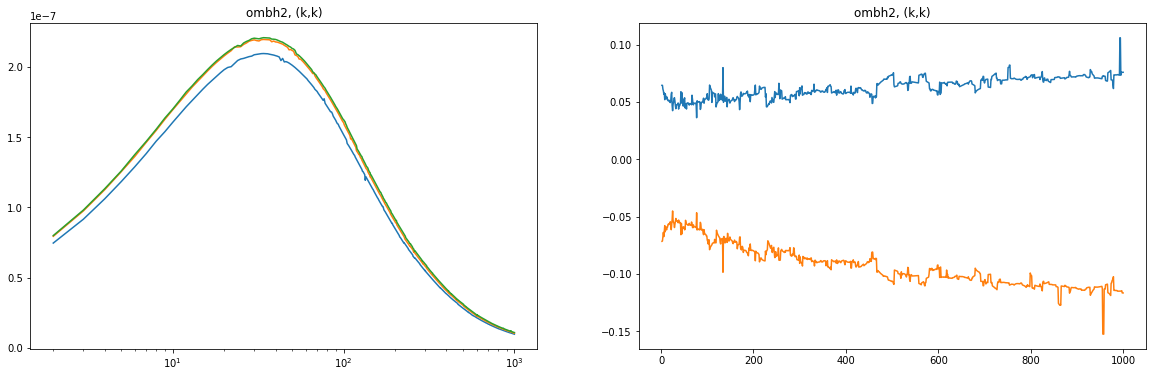

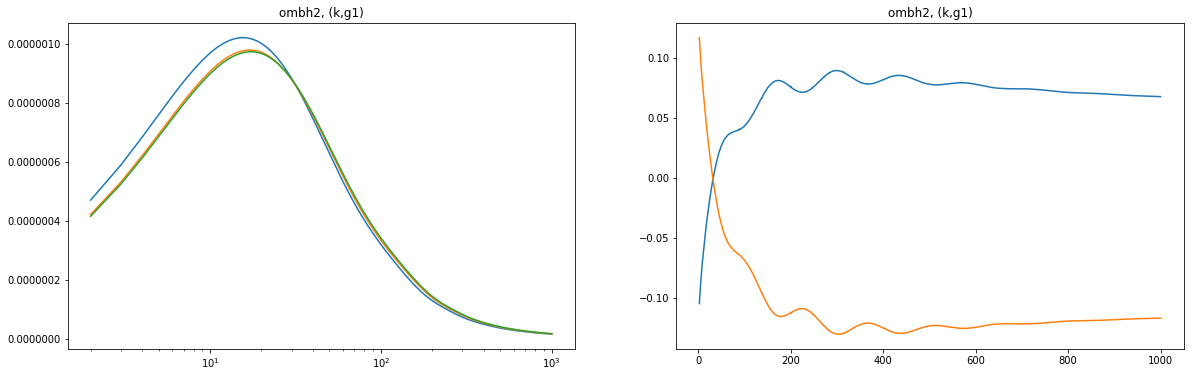

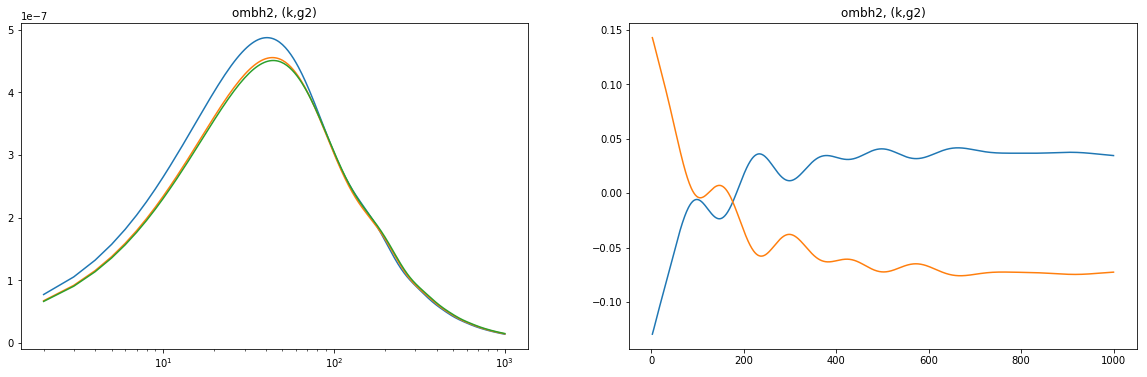

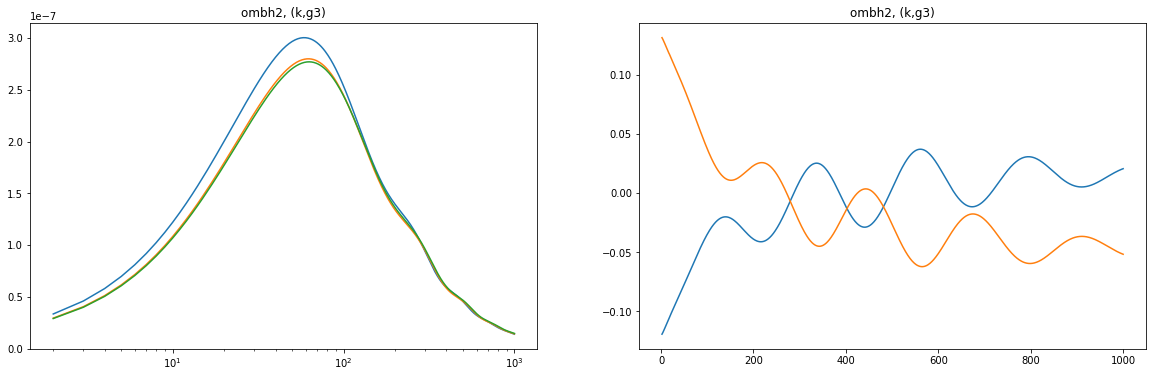

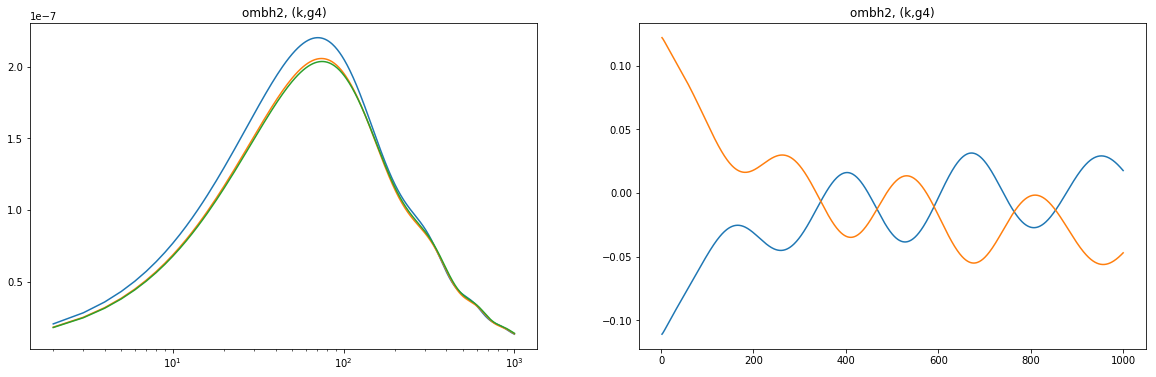

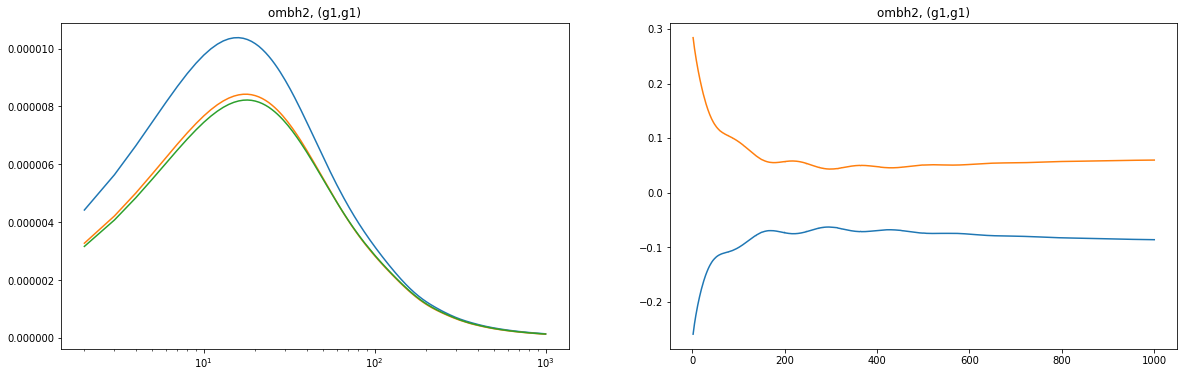

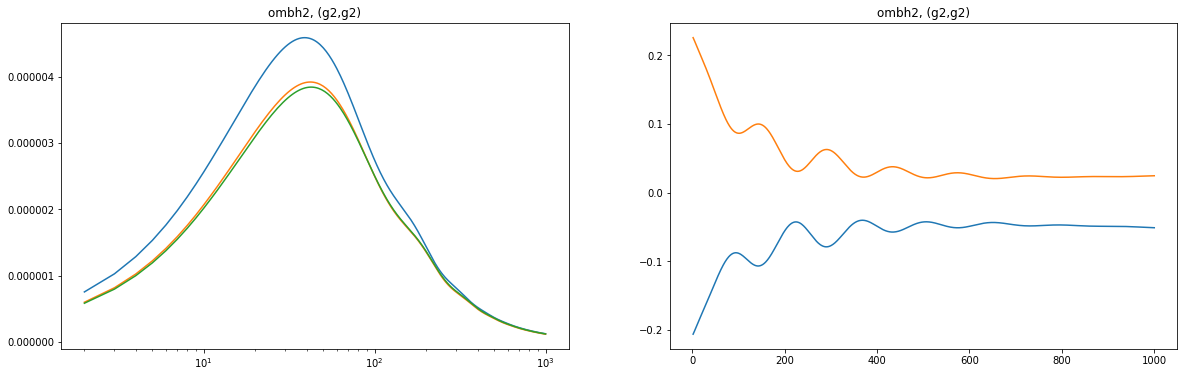

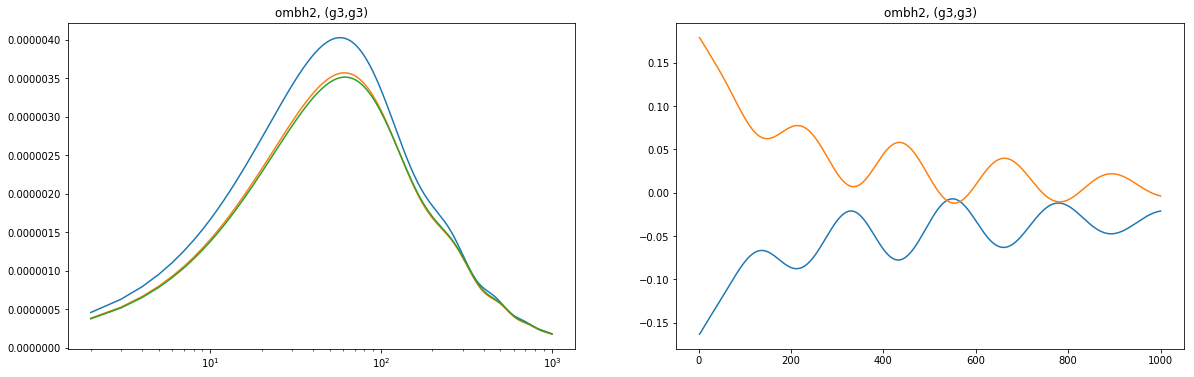

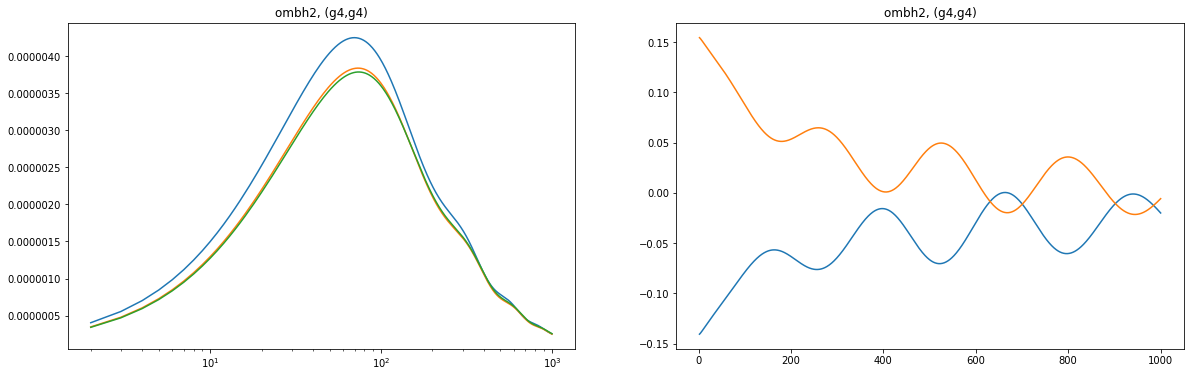

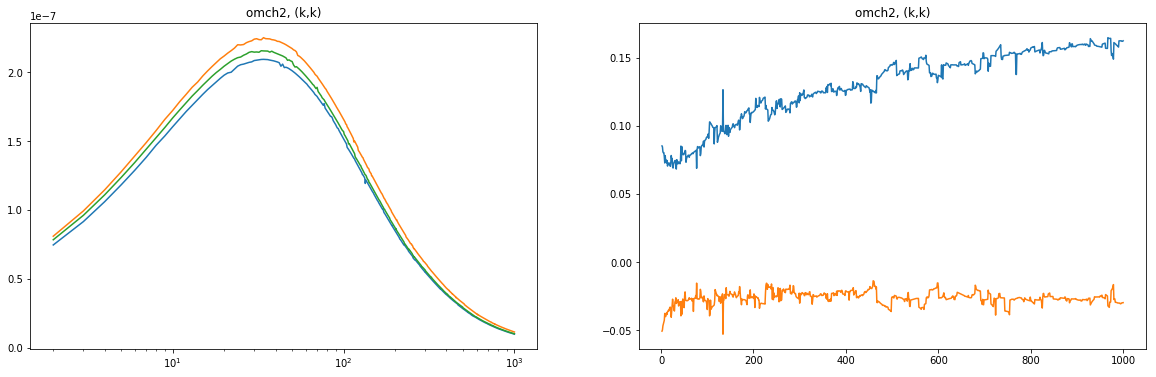

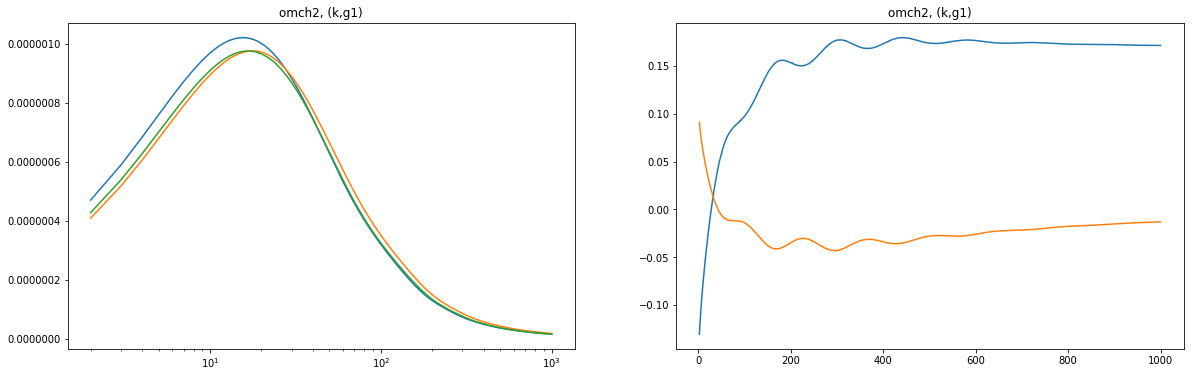

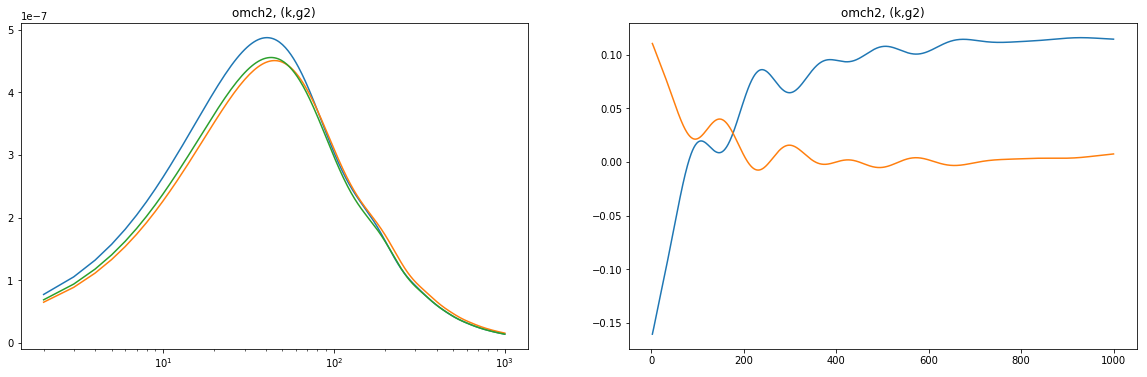

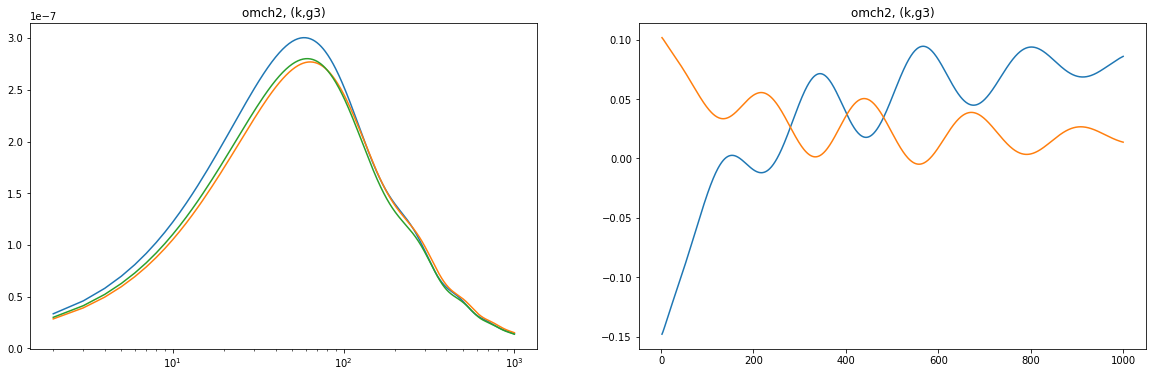

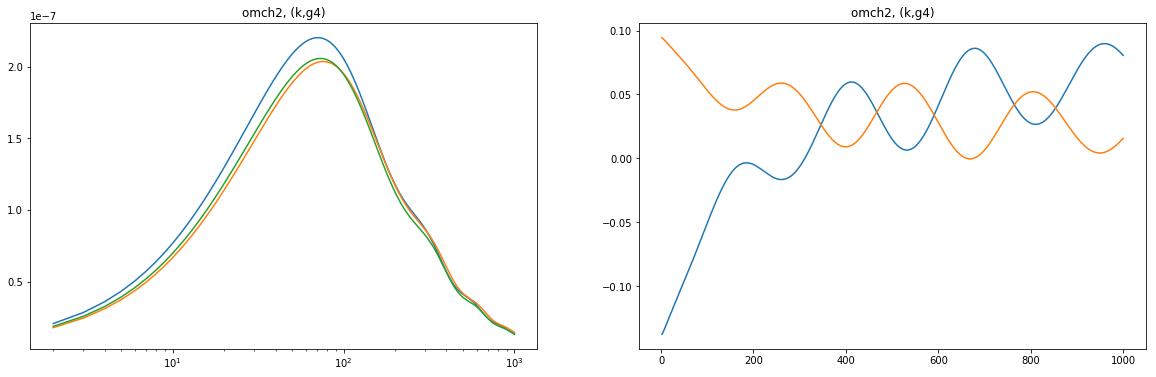

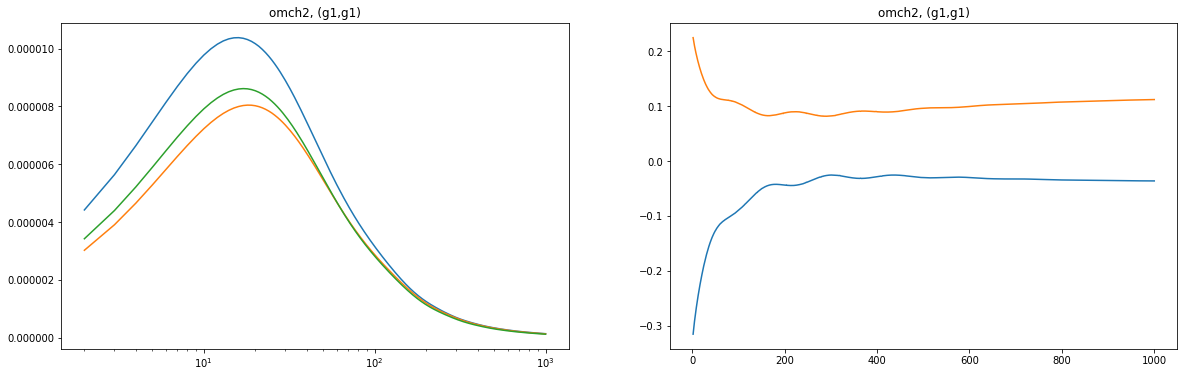

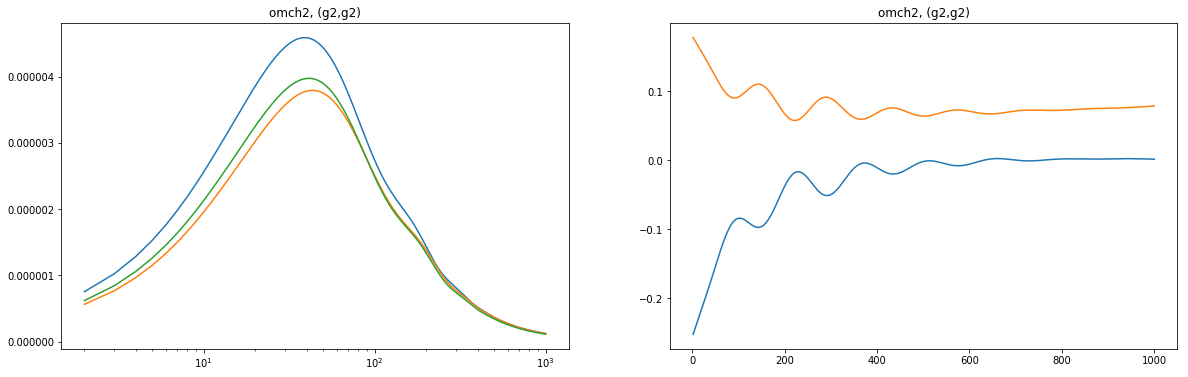

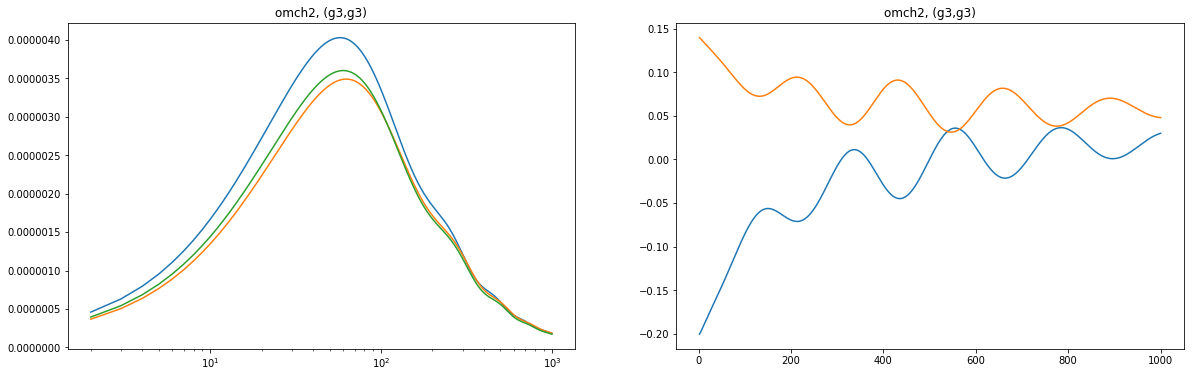

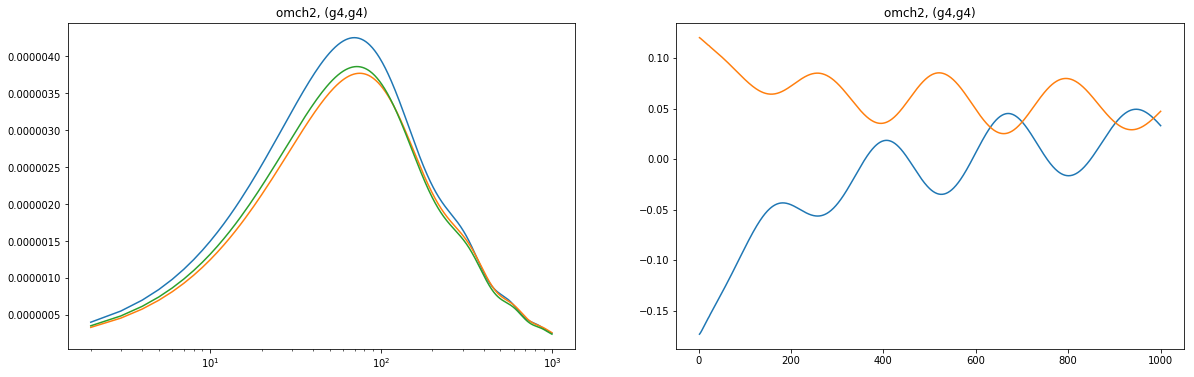

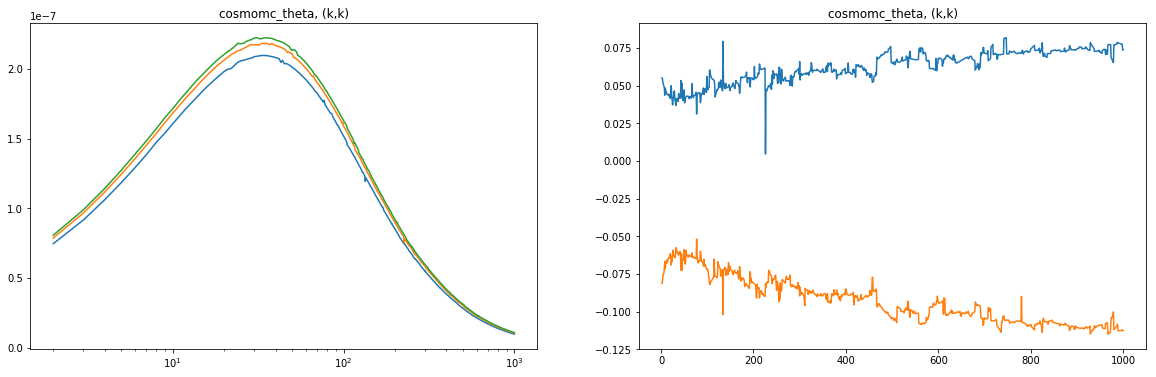

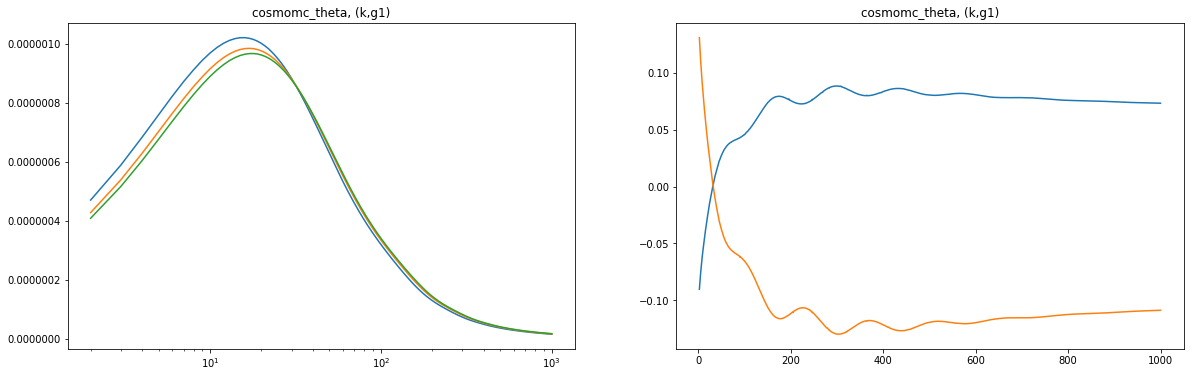

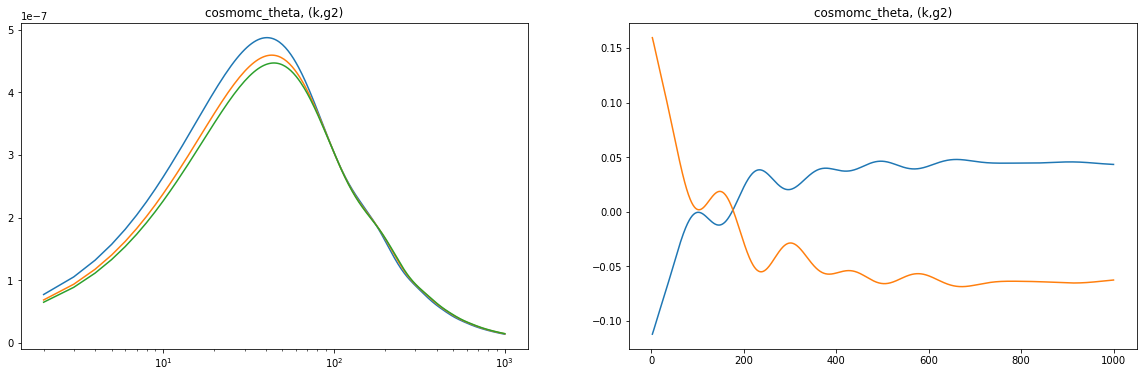

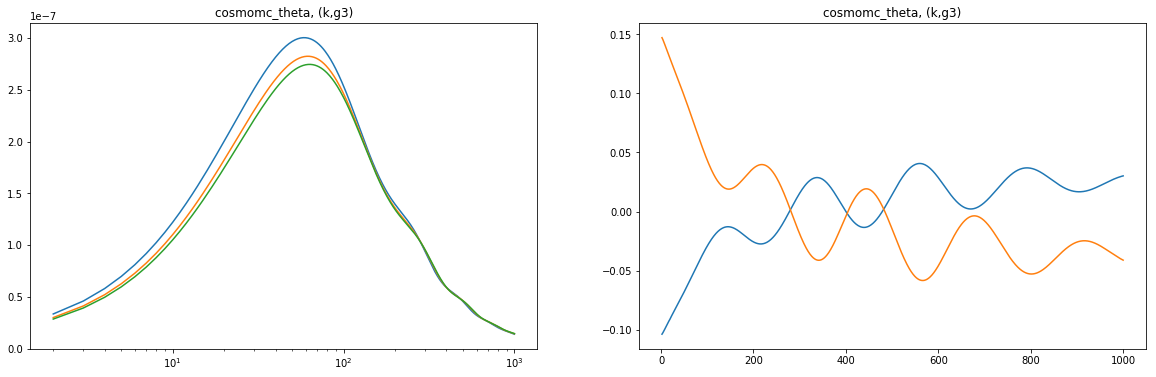

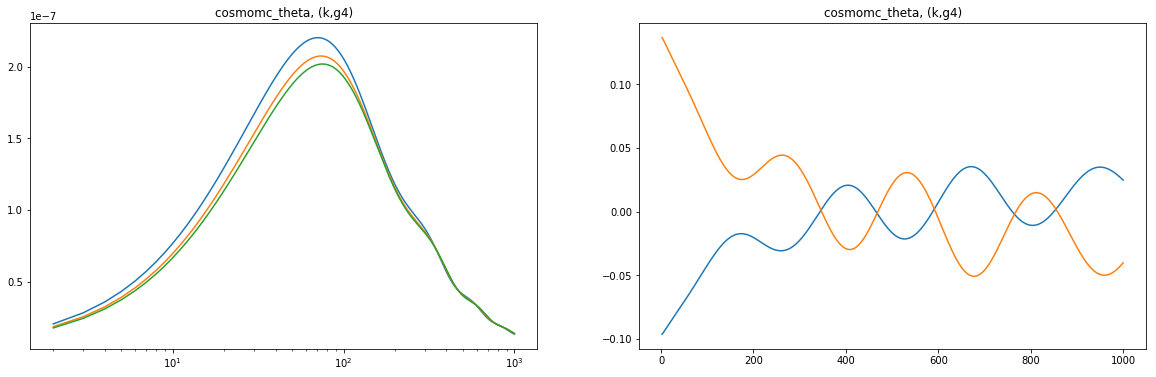

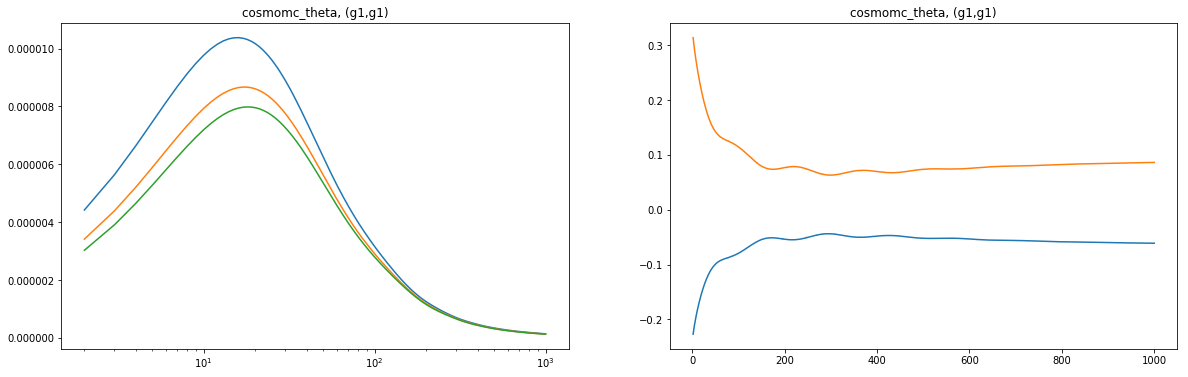

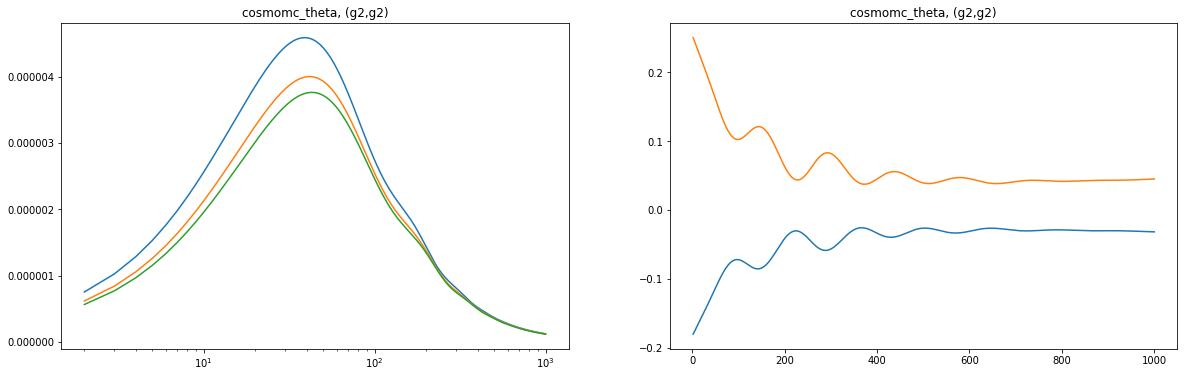

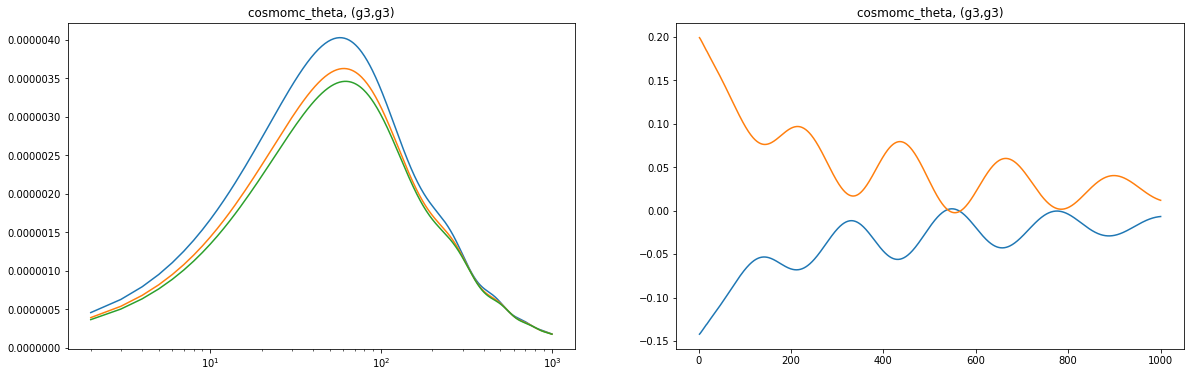

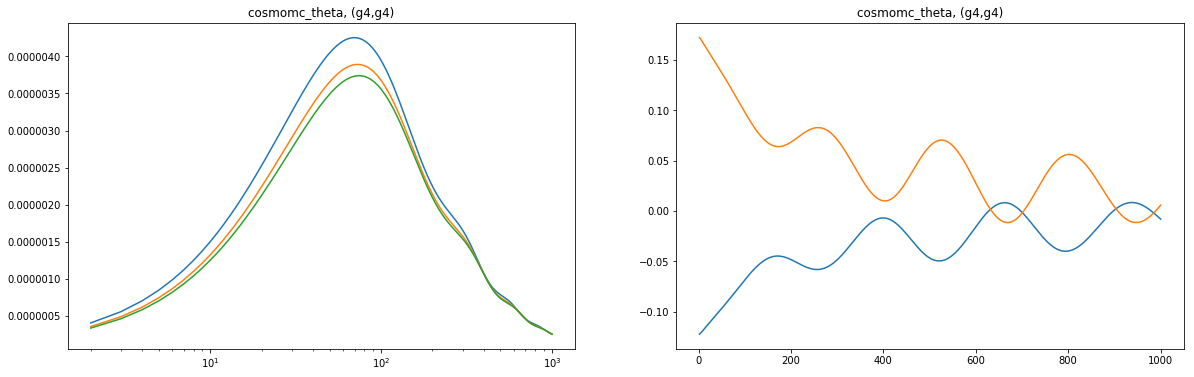

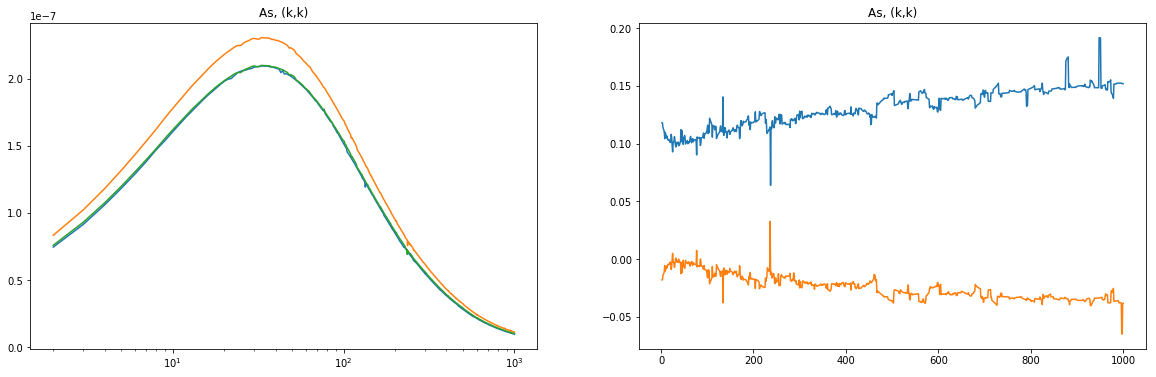

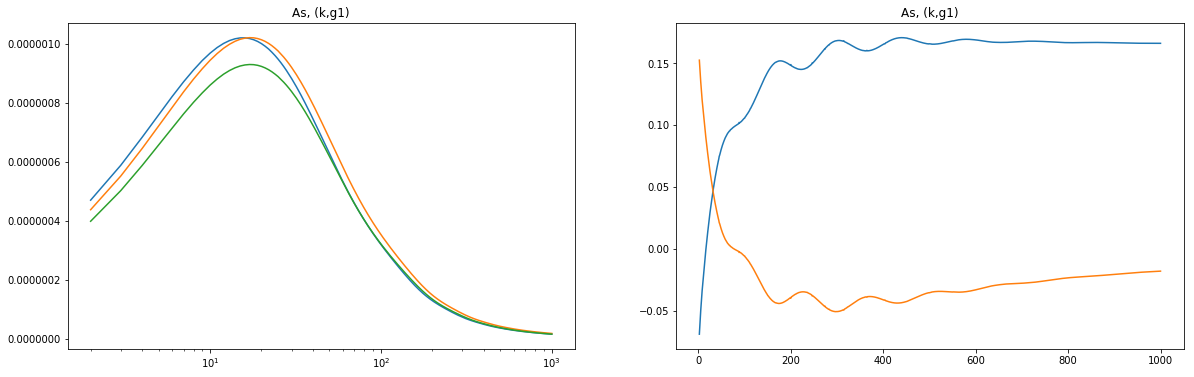

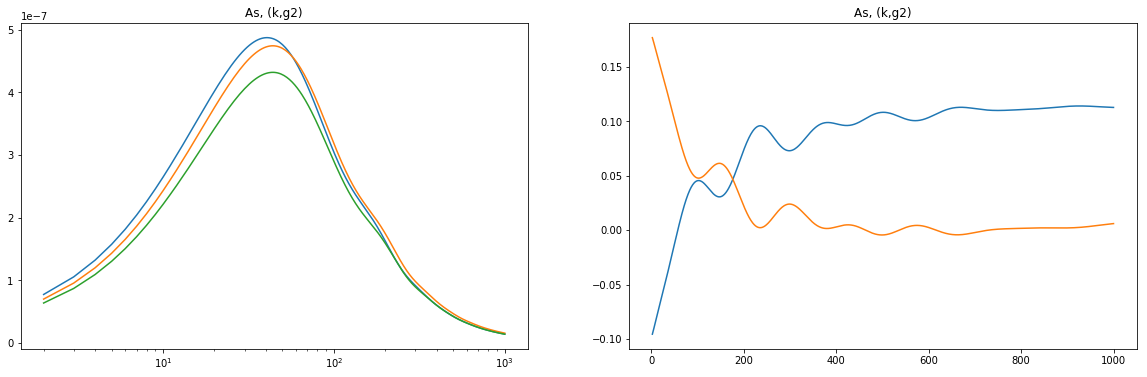

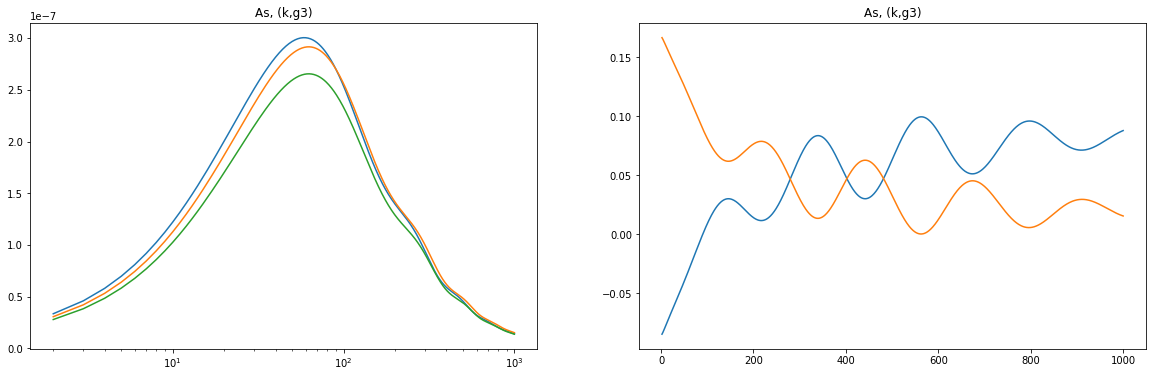

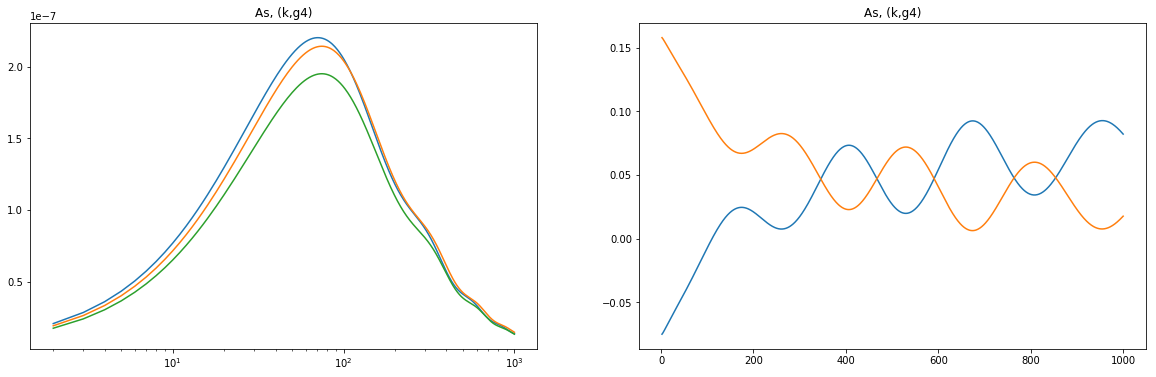

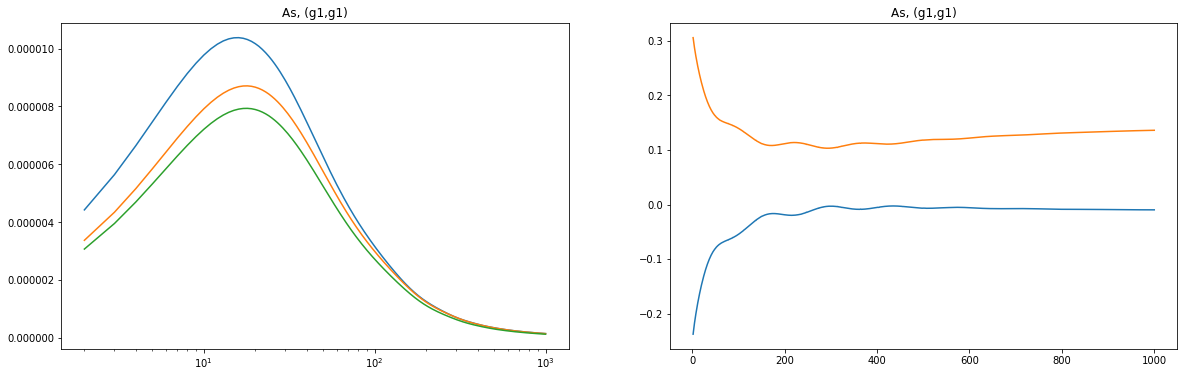

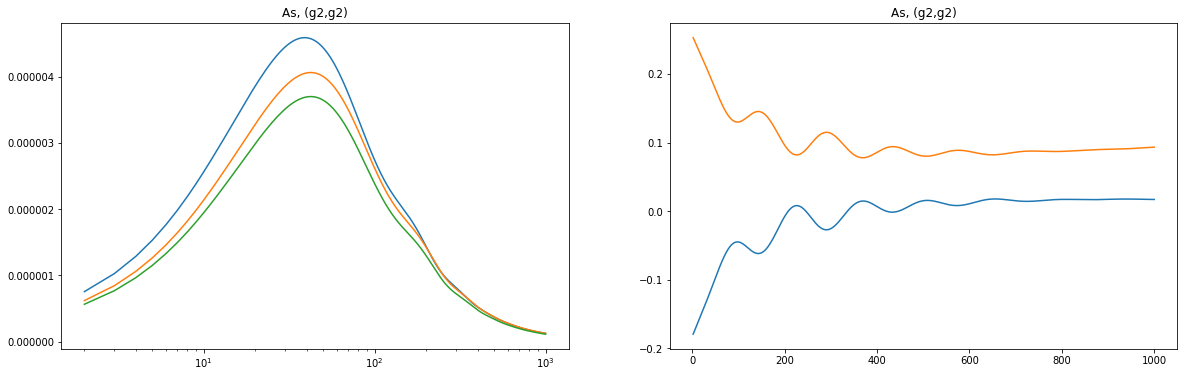

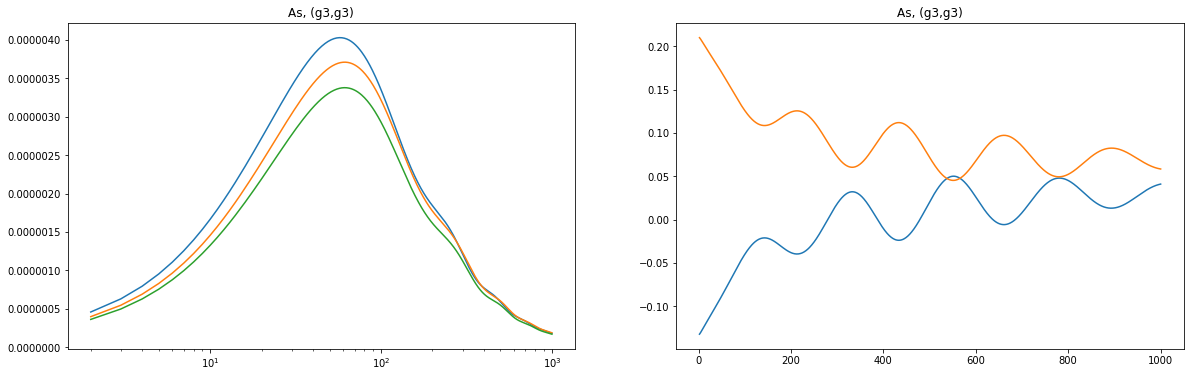

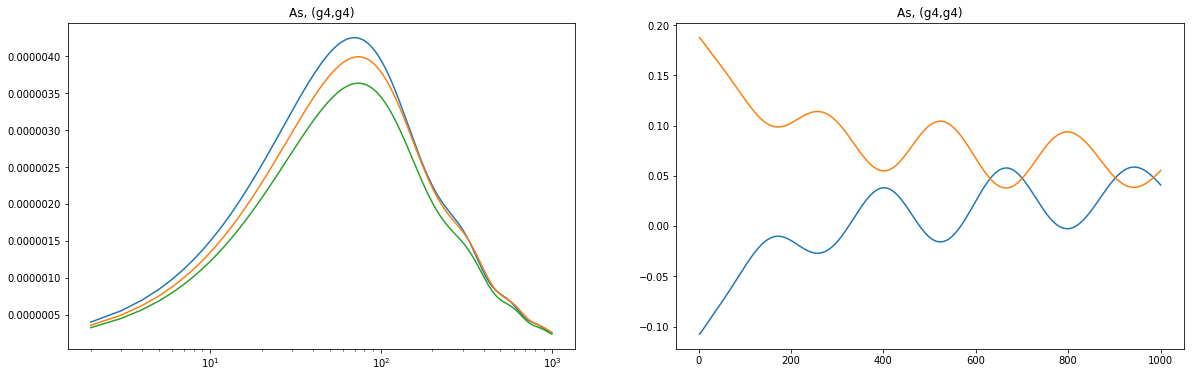

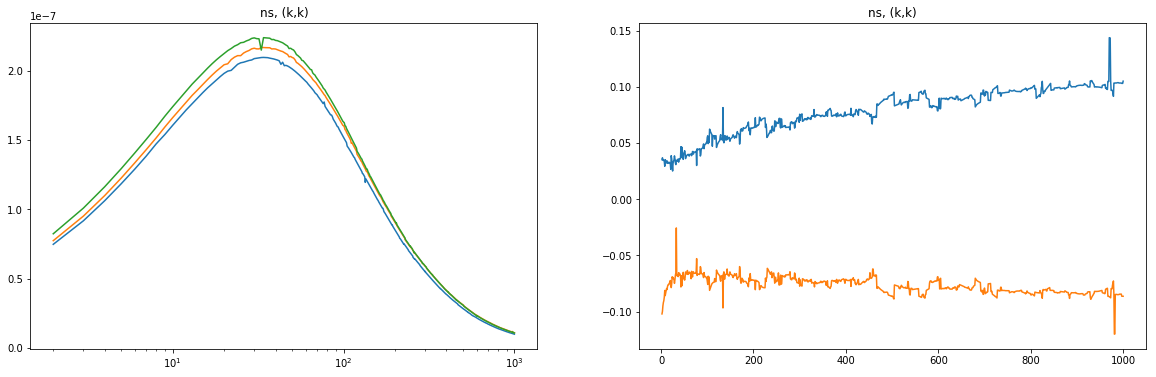

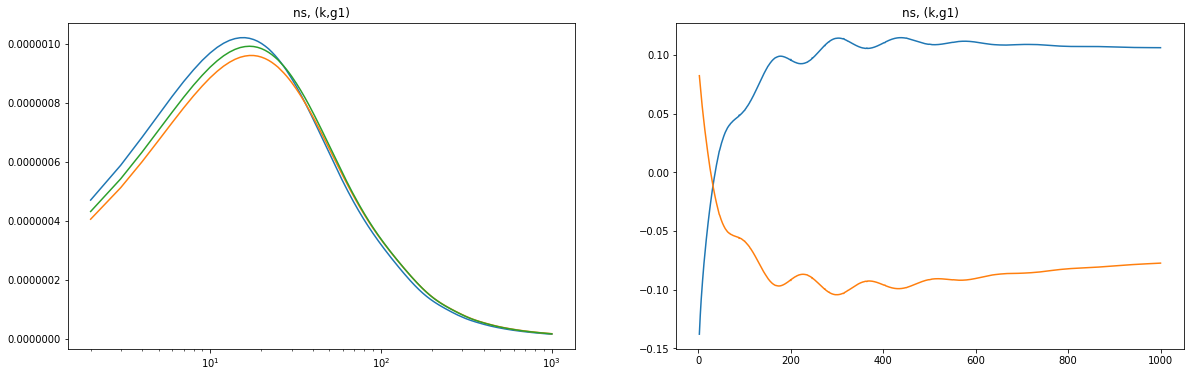

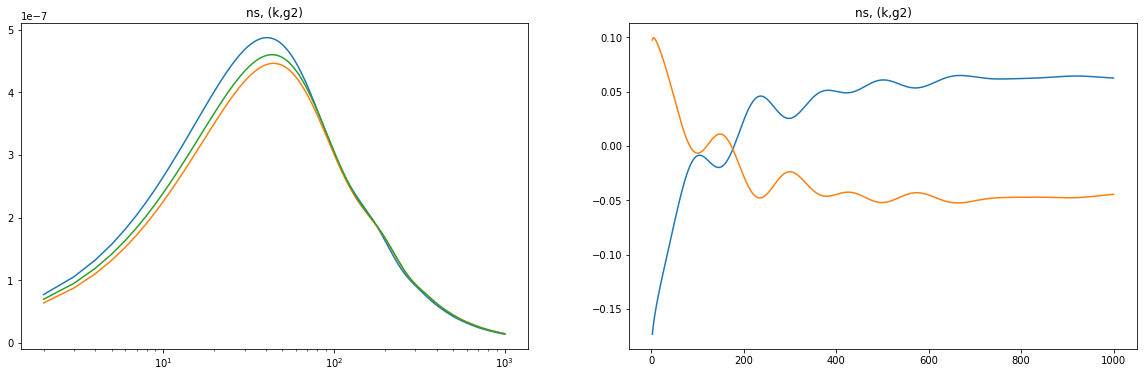

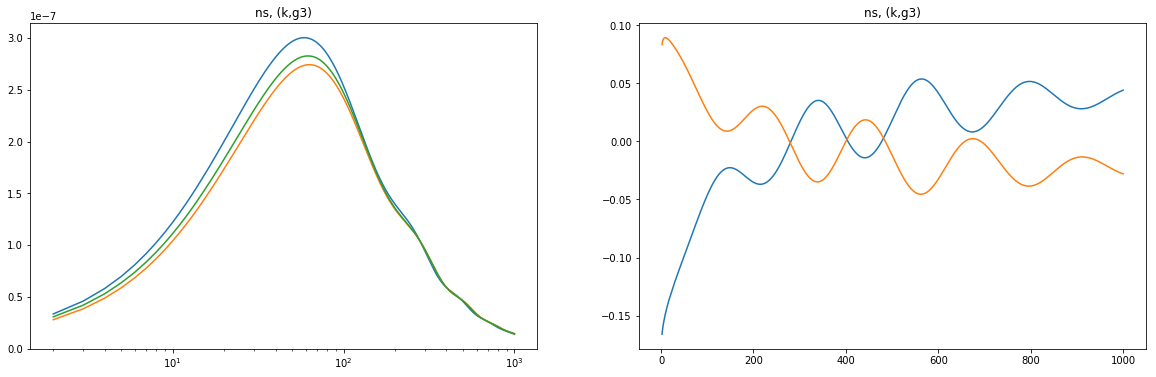

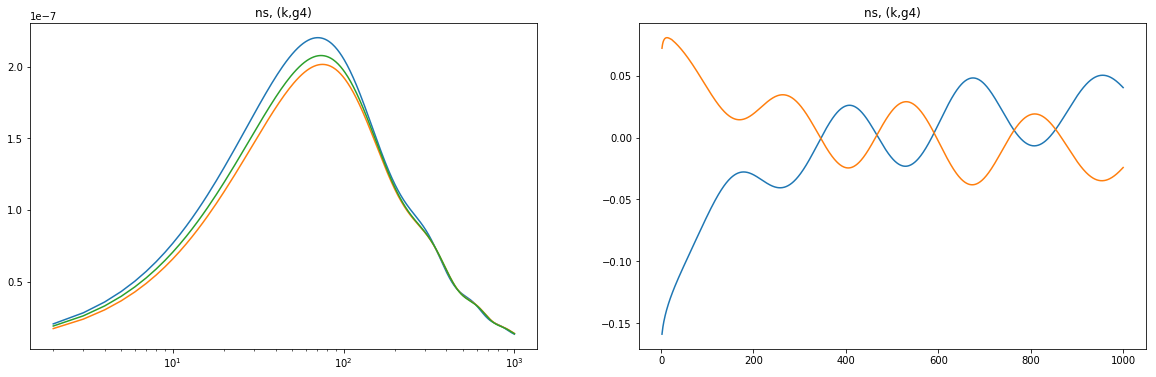

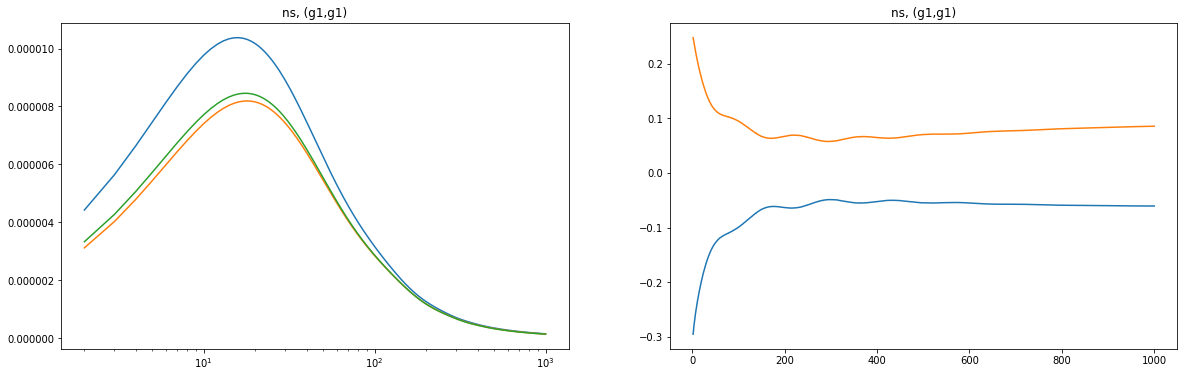

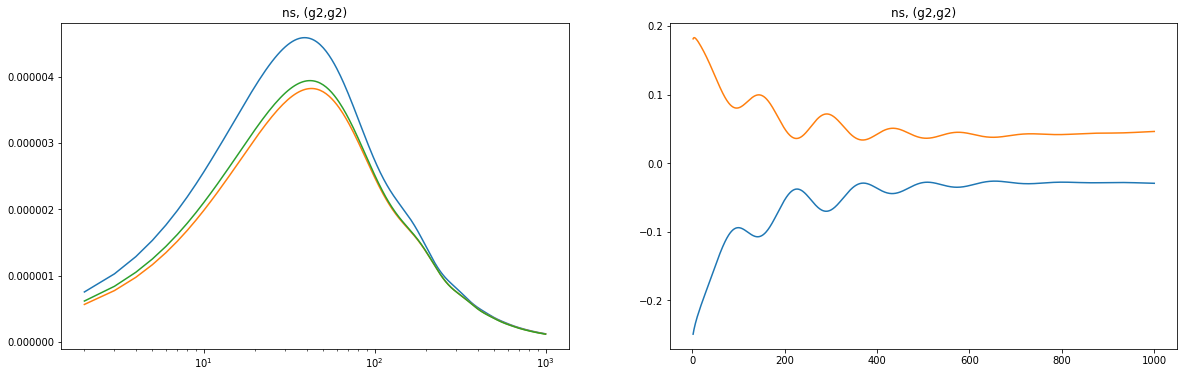

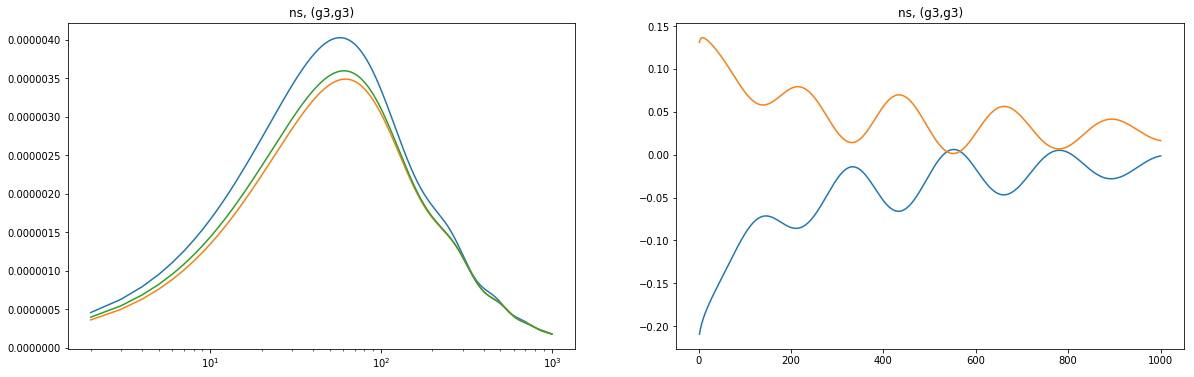

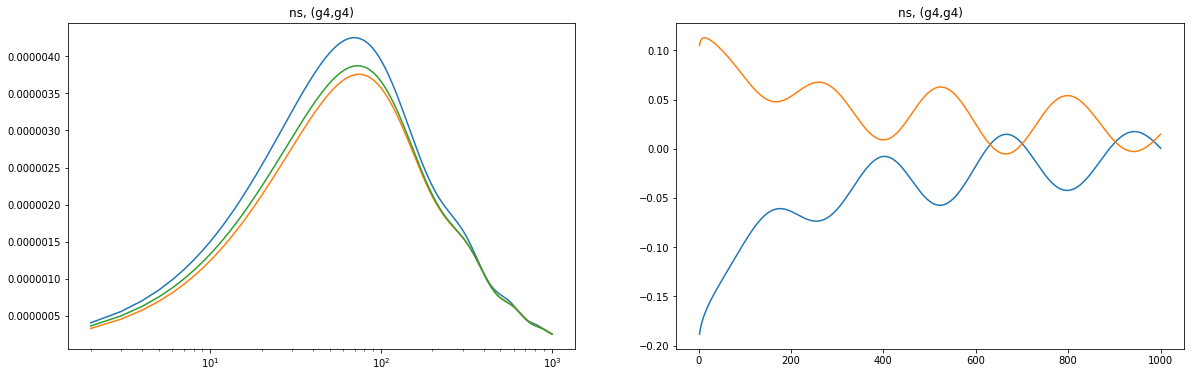

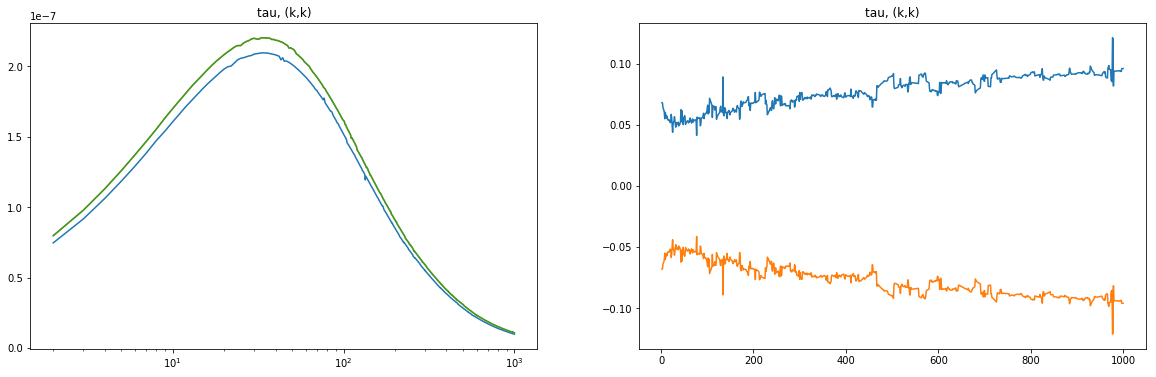

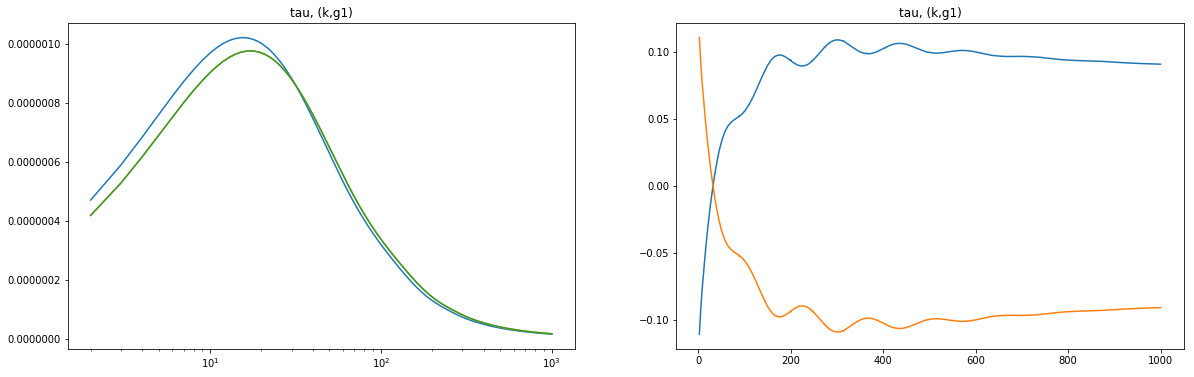

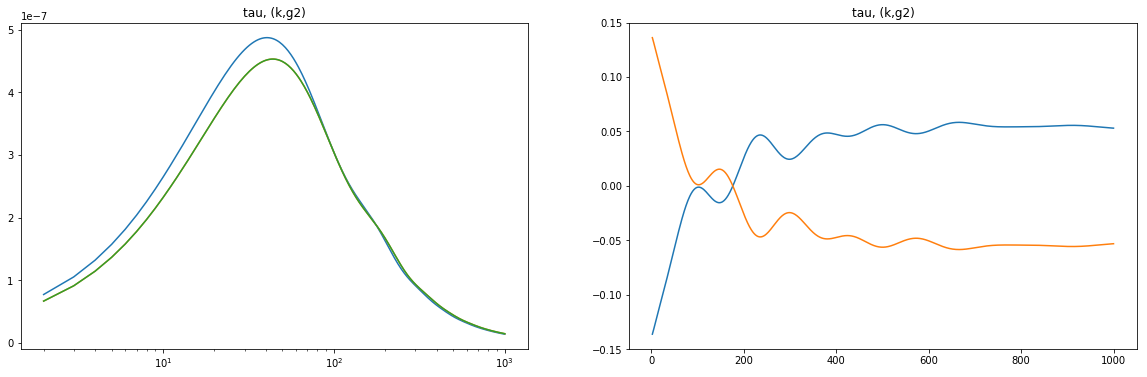

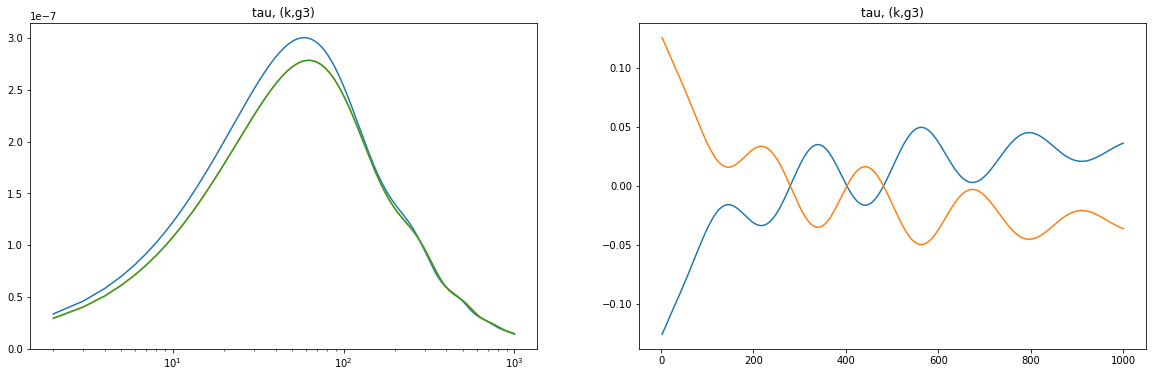

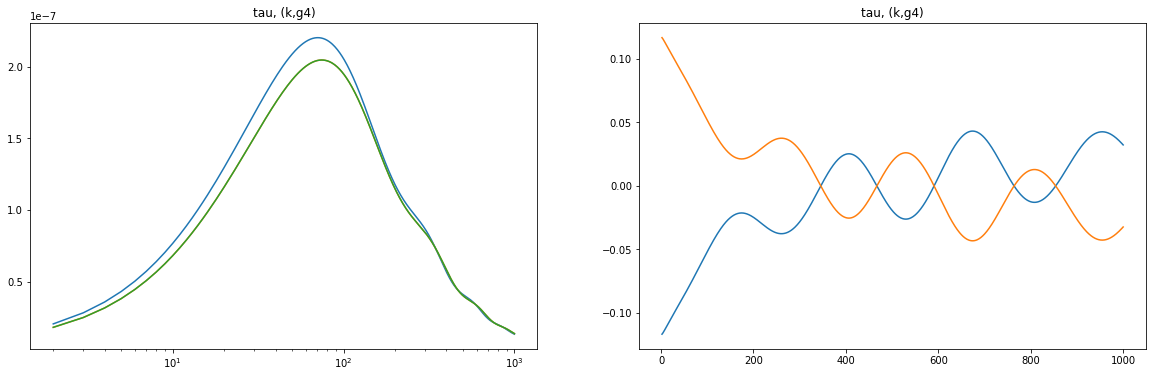

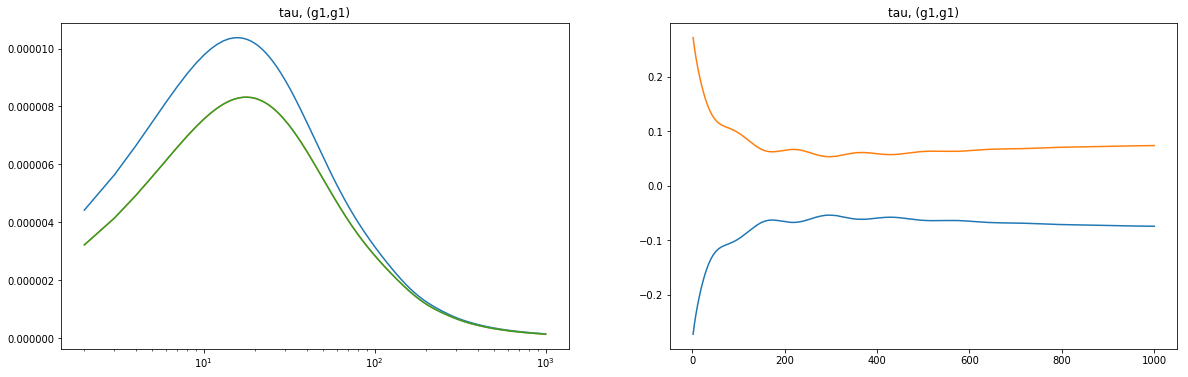

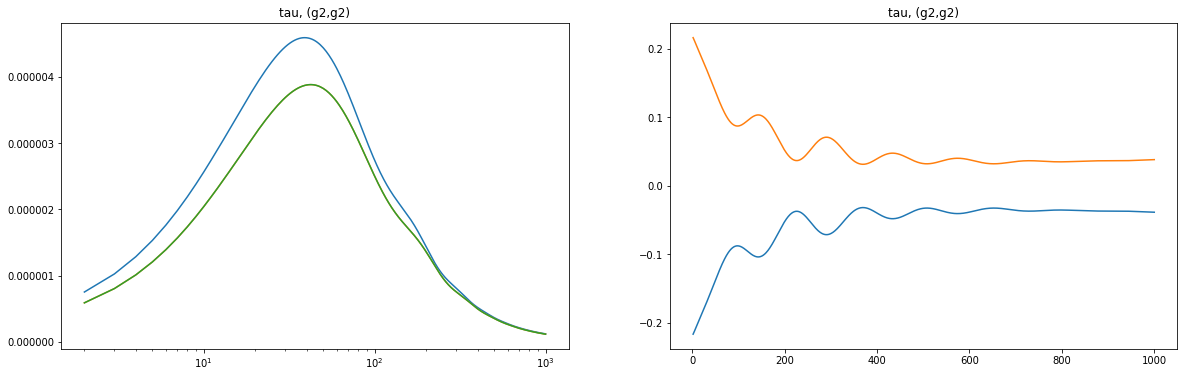

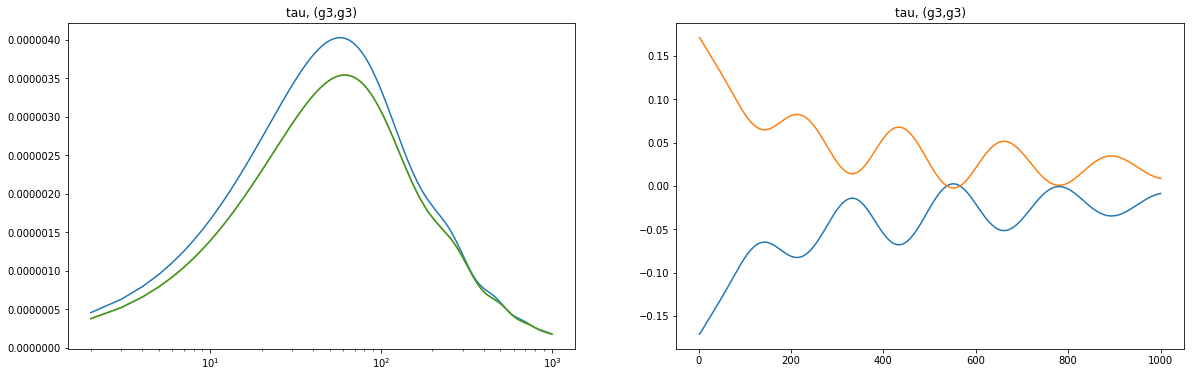

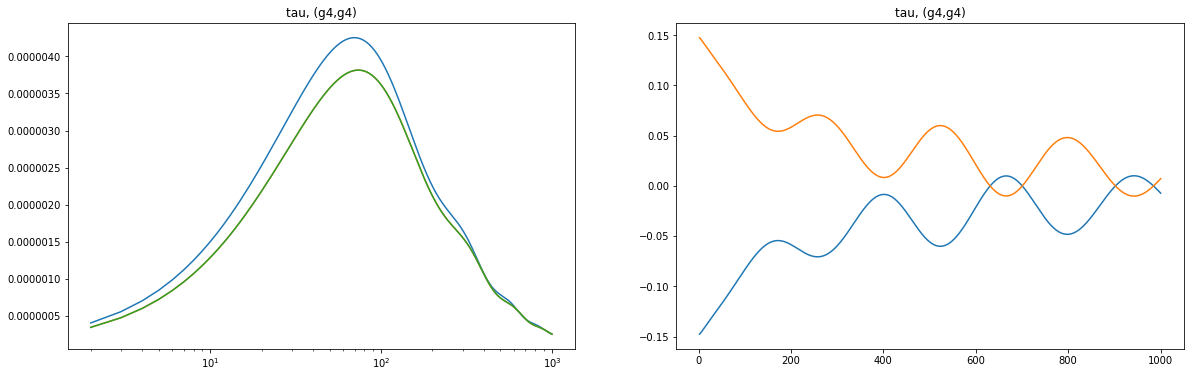

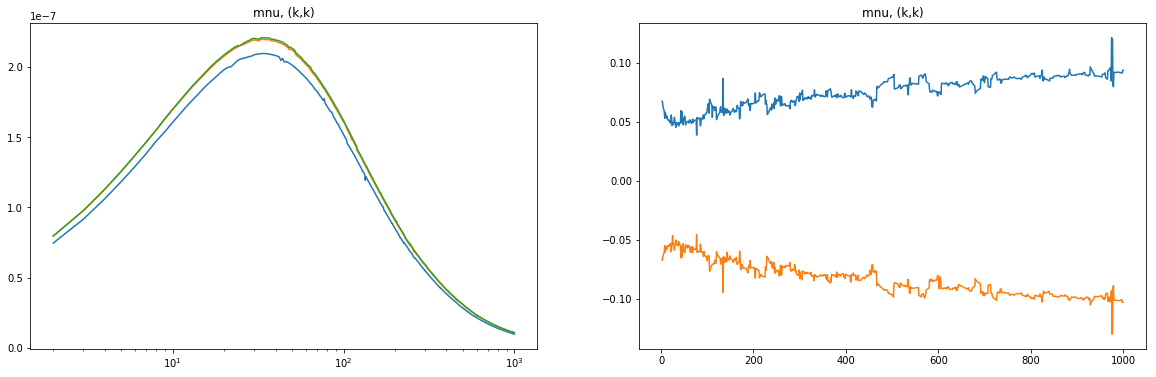

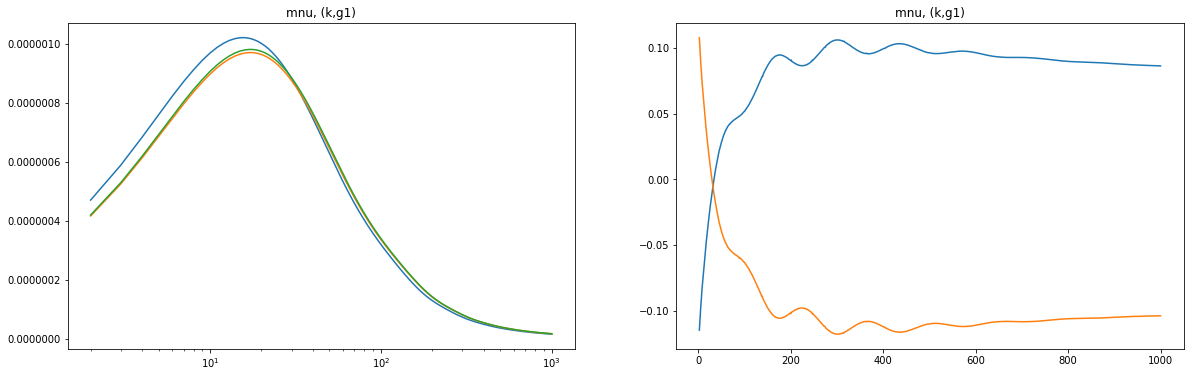

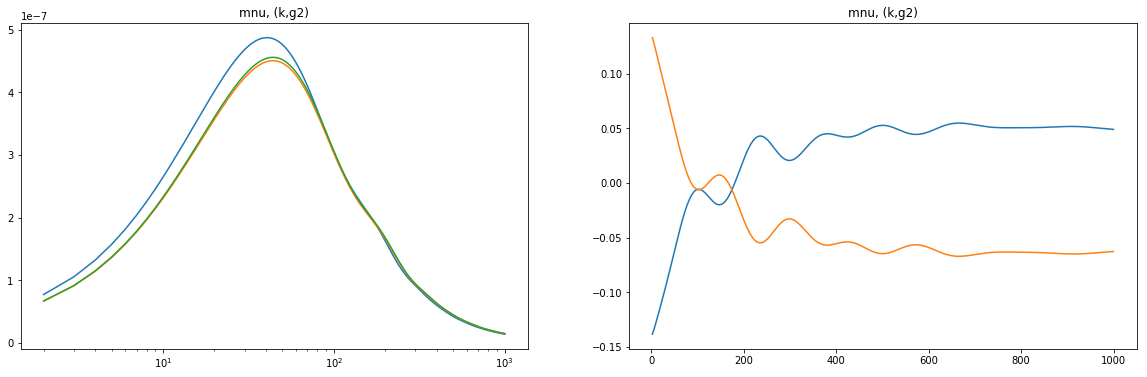

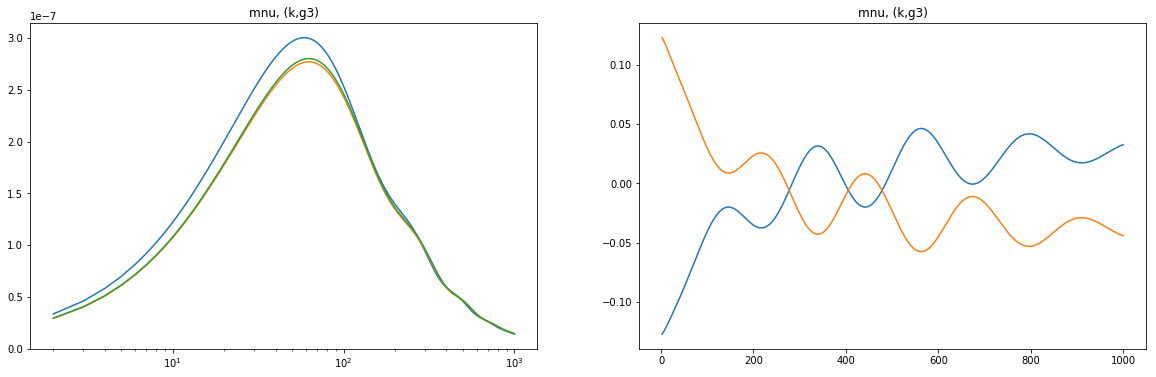

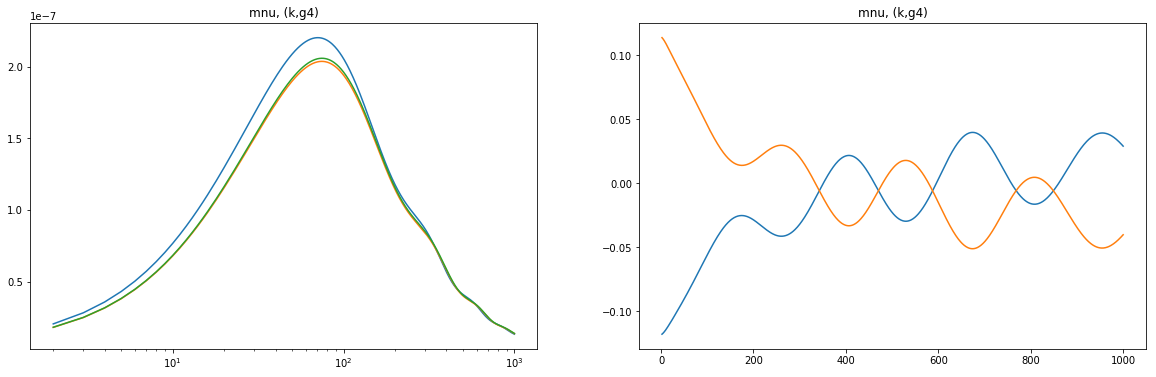

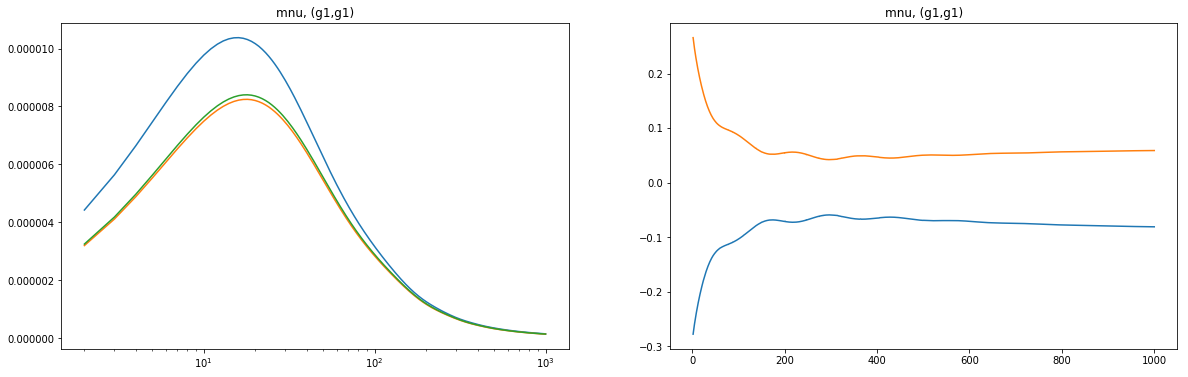

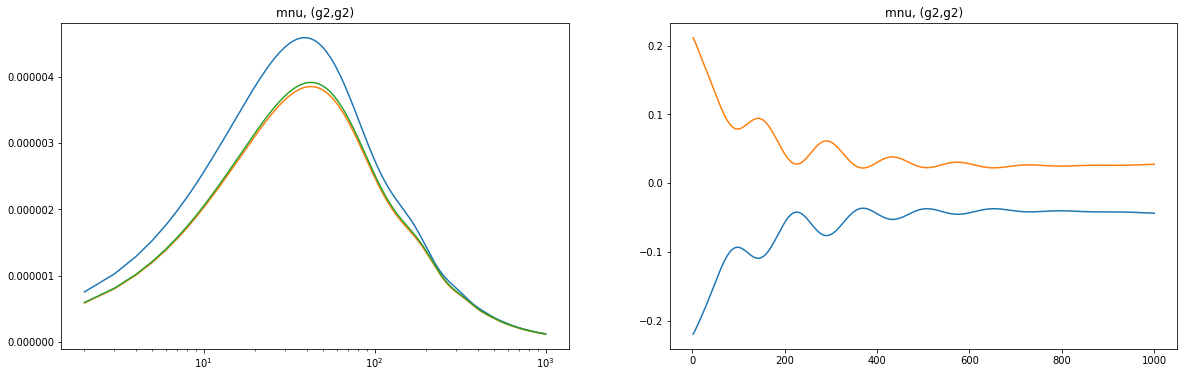

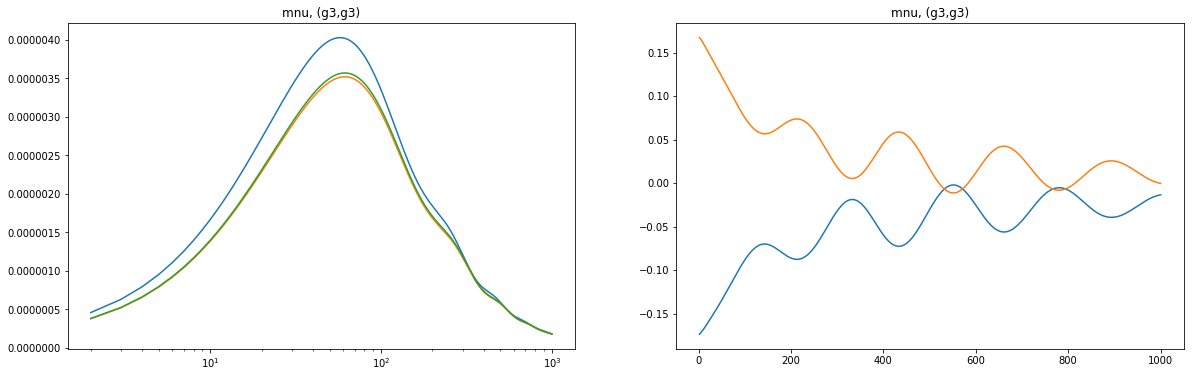

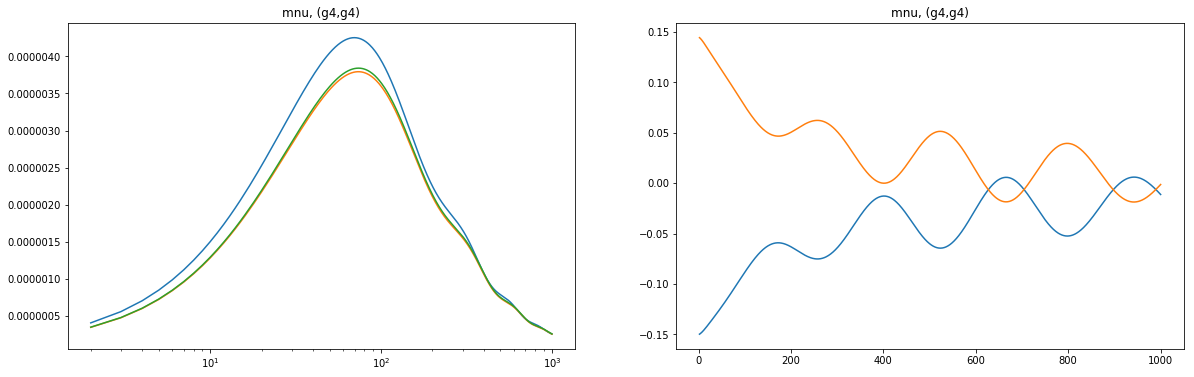

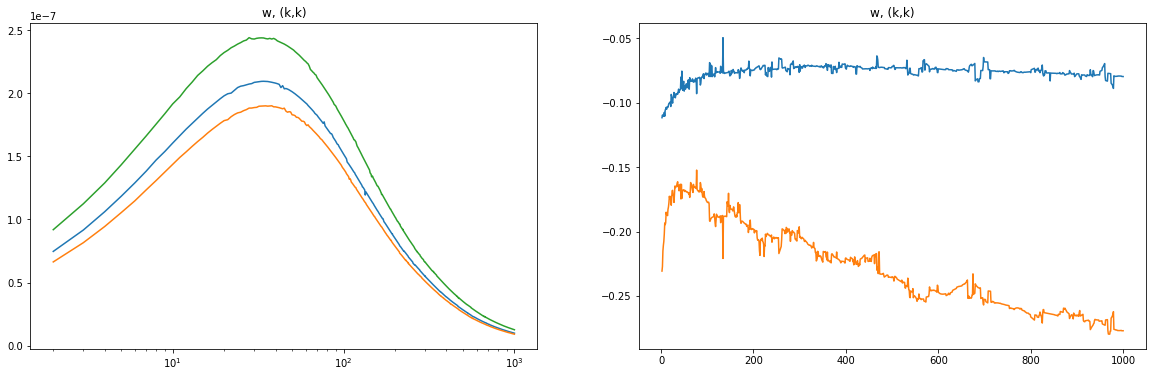

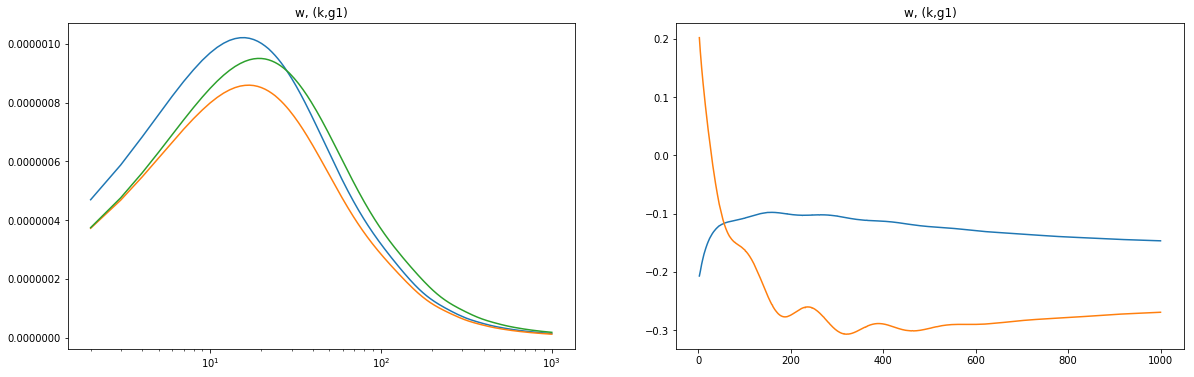

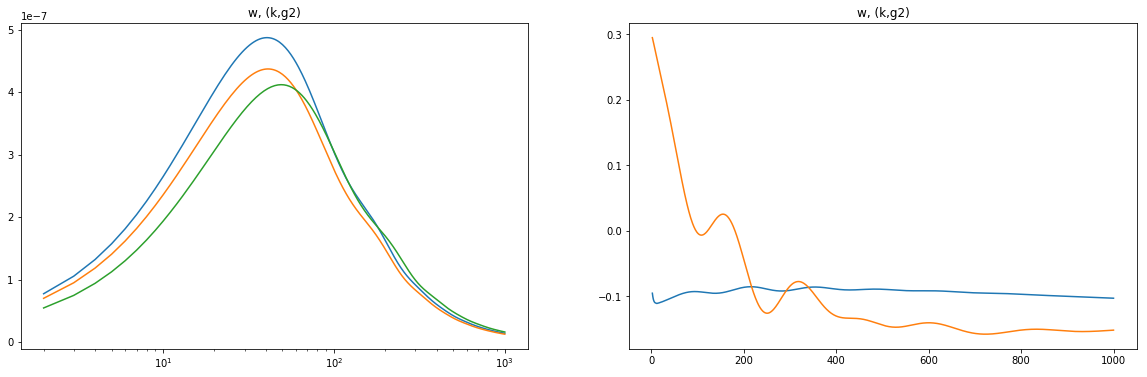

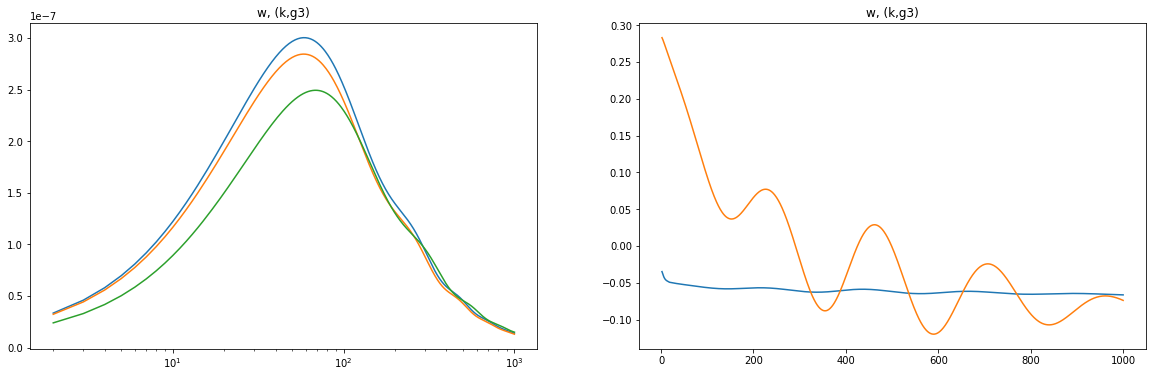

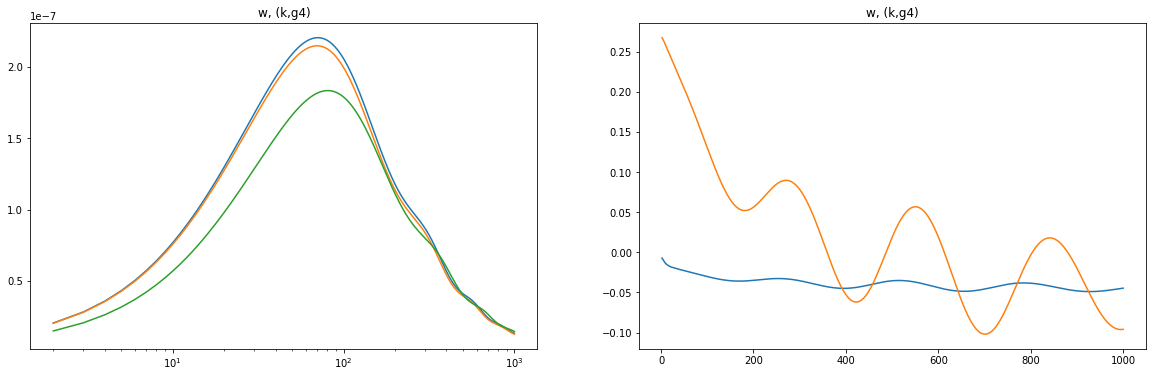

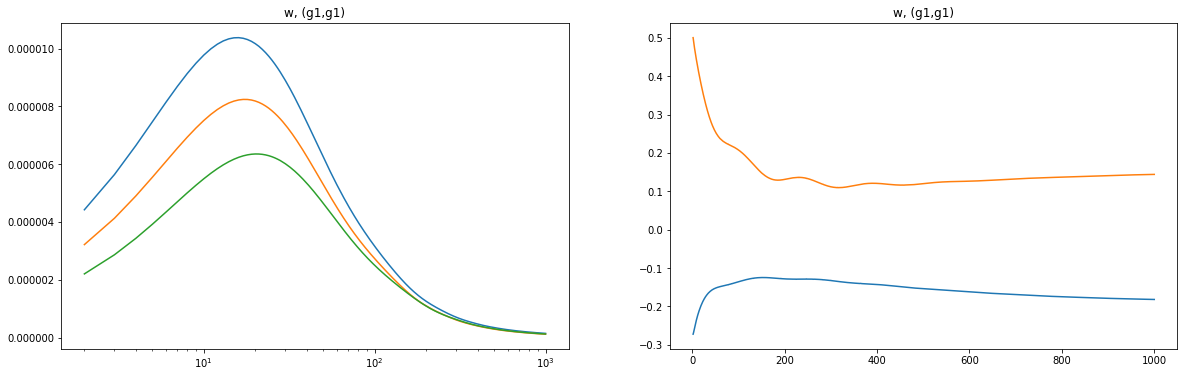

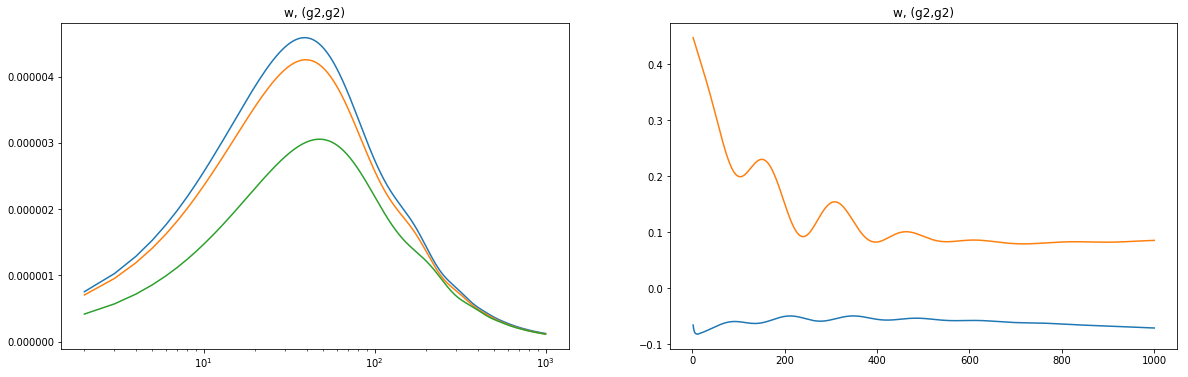

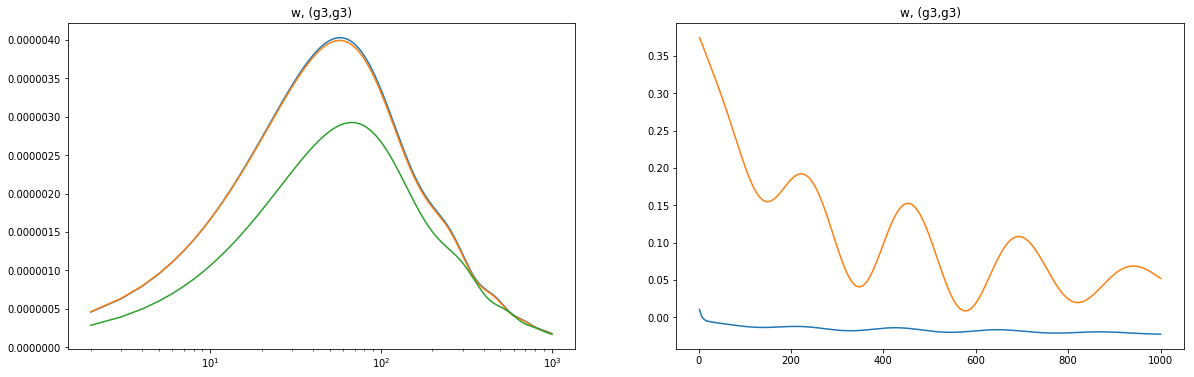

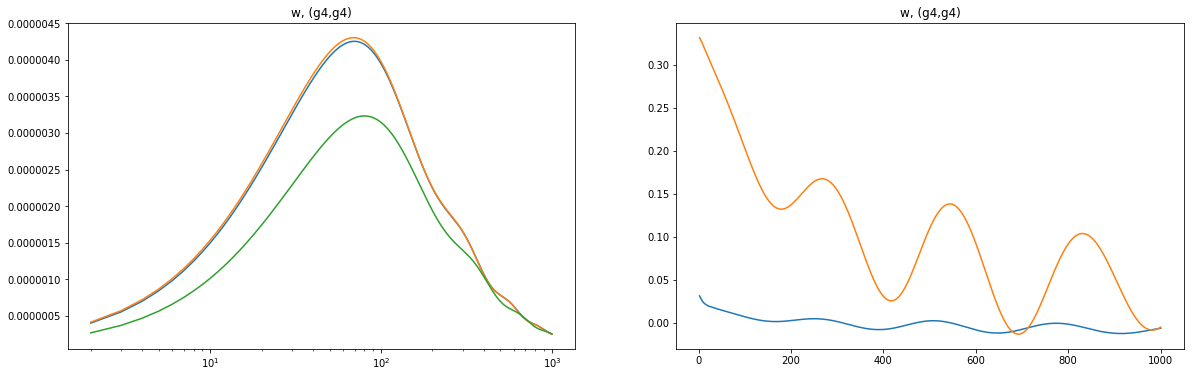

In [104]:
%matplotlib inline
for param in range(nCosParams):        
    for obs1 in range(nMaps):
        for obs2 in range(obs1,nMaps):
            if obs1 == 0 or obs1 == obs2:
                nominal = Fobj.crossCls[obs1,obs2]
                plus = Fobj.crossClsPlus[obs1,obs2,param]
                minus = Fobj.crossClsMinus[obs1,obs2,param]
                obsCode = obsList[obs1*nMaps+obs2 - obs1*(obs1+1)/2]
                f, axarr = plt.subplots(1,2,figsize=(20,6))
                
                plt.sca(axarr[0])
                plt.semilogx(ells,nominal)
                plt.semilogx(ells,plus)
                plt.semilogx(ells,minus)
                plt.title(paramList[param]+', ('+obsName(obsCode)+')')
                
                plt.sca(axarr[1])
                plt.plot(ells,(plus-nominal)/nominal)
                plt.plot(ells,(nominal-minus)/nominal)
                plt.title(paramList[param]+', ('+obsName(obsCode)+')')
                
                plt.show()

# Match Byeonghee's plots

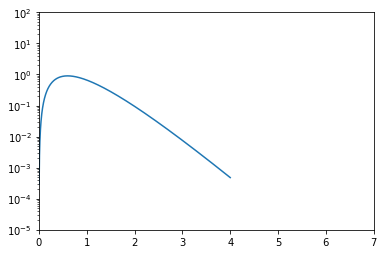

In [105]:
# dn/dz
zs = np.linspace(0,4,1000)
z0 = 0.3
dndzs = cp.modelDNDZ(zs,z0)
plt.semilogy(zs,dndzs)
plt.ylim([1e-5,1e2])
plt.xlim([0,7])
plt.show()

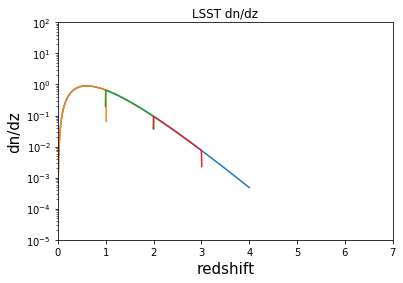

In [106]:
# now in bins
%matplotlib inline
for binNum in range(4):
    dndzF = cp.getDNDZinterp(binNum=binNum,zmin=0,zmax=4,nBins=4,z0=z0)
    plt.semilogy(zs,dndzF(zs))
plt.ylim([1e-5,1e2])
plt.xlim([0,7])
plt.xlabel('redshift',fontsize=15)
plt.ylabel('dn/dz',fontsize=15)
plt.title('LSST dn/dz')
plt.show()

(5, 5, 999)
5


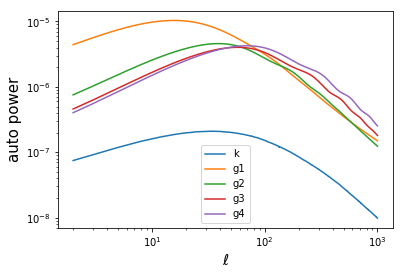

In [107]:
# plot auto power spectra
print Fobj.crossCls.shape
# auto power are on diagonal
print nMaps
labels = ['k','g1','g2','g3','g4']
for mapNum in range(nMaps):
    plt.loglog(ells,Fobj.crossCls[mapNum,mapNum],label=labels[mapNum])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('auto power',fontsize=15)
plt.legend()
plt.show()

(5, 5, 999)
5


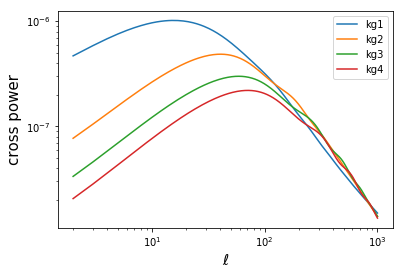

In [108]:
# plot kappa cross galaxy spectra
print Fobj.crossCls.shape
# auto power are on diagonal
print nMaps
labels = ['kk','kg1','kg2','kg3','kg4']
for mapNum in range(1,nMaps):
    plt.loglog(ells,Fobj.crossCls[0,mapNum],label=labels[mapNum])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('cross power',fontsize=15)
plt.legend()
plt.show()

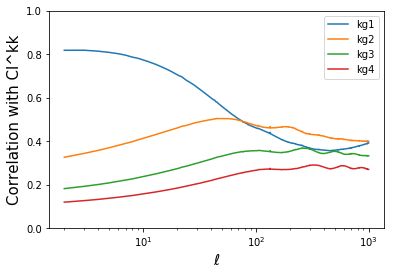

In [122]:
#plot correlation coefficients
labels = ['kk','kg1','kg2','kg3','kg4']
for mapNum in range(1,nMaps):
    Clkg = Fobj.crossCls[0,mapNum]
    Clkk = Fobj.crossCls[0,0]
    Clgg = Fobj.crossCls[mapNum,mapNum]
    r = Clkg/np.sqrt(Clkk*Clgg)
    plt.semilogx(ells,r,label=labels[mapNum])
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('Correlation with Cl^kk',fontsize=15)
plt.ylim([0,1])
plt.legend()
plt.show()

# Compare result against Byeonghee's result

In [110]:
# display the sigmas
# this does not take lmin= 50 into account.
paramList = Fobj.paramList
sigmas = Fobj.getSigmas()
for i, param in enumerate(paramList):
    print param, ': ',sigmas[i]

ombh2 :  0.000249831936537
omch2 :  0.000764997507935
cosmomc_theta :  1.77578360245e-05
As :  1.3949044892e-11
ns :  0.002537780967
tau :  0.816594462937
mnu :  0.0135341316019
w :  0.0164534510045
bin1 :  0.00386389448671
bin2 :  0.00400542616304
bin3 :  0.00557050384874
bin4 :  0.00713733906677


In [111]:
# remake the kappa-g Fij with lmin=50 to match the other Fij
# make comparison against version with higher lmin
# copy some code from FisherMatrix.__init__

def makeFisher(Fobj,lmin,lmax):
    """ code copied from FisherMatrix.__init__
        Inputs:
            Fobj:
            lmin: minimum ell to make Fij
    """
    #Build Fisher matrix
    #multply vectorT,invcov,vector and add up
    print 'building Fisher matrix from components...'
    print 'invCov.shape: ',Fobj.invCov.shape,', dClVecs.shape: ',Fobj.dClVecs.shape
    nParams = Fobj.nParams
    #lmax = 2000 #Fobj.lmax
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    for i in range(nParams):
      print 'starting bin set ',i+1,' of ',nParams
      dClVec_i = Fobj.dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = Fobj.dClVecs[:,j,:] # shape (nCls,nElls)
        # ugh.  don't like nested loops in Python... but easier to program...
        for ell in range(lmin-2,lmax-1): #-2 to match the indices
          myCov = Fobj.invCov[:,:,ell]
          fij = np.dot(dClVec_i[:,ell],np.dot(myCov,dClVec_j[:,ell]))
          
          Fij[i,j] += fij
    
    print 'creation of Fisher Matrix complete!\n'
    return Fij

In [112]:
lmin=50
Fij2 = makeFisher(Fobj,lmin,lmax)
sigmas2 = np.sqrt(np.diag(np.linalg.inv(Fij2)))

building Fisher matrix from components...
invCov.shape:  (15, 15, 999) , dClVecs.shape:  (15, 12, 999)
starting bin set  1  of  12
starting bin set  2  of  12
starting bin set  3  of  12
starting bin set  4  of  12
starting bin set  5  of  12
starting bin set  6  of  12
starting bin set  7  of  12
starting bin set  8  of  12
starting bin set  9  of  12
starting bin set  10  of  12
starting bin set  11  of  12
starting bin set  12  of  12
creation of Fisher Matrix complete!



In [113]:
# add prior on Tau
tauNum = 5
priorTauSigma = 0.02
tauPrior = 1/priorTauSigma**2
print Fij2[tauNum,tauNum]
Fij2[tauNum,tauNum] = Fij2[tauNum,tauNum] + tauPrior 
print Fij2[tauNum,tauNum]

# remake sigmas2 with this
sigmas2 = np.sqrt(np.diag(np.linalg.inv(Fij2)))

4.80946163022
2504.80946163


In [114]:
for i,p in enumerate(paramList):
    print p, sigmas2[i]

ombh2 0.000250127299925
omch2 0.00077442346388
cosmomc_theta 1.78261887737e-05
As 1.41770774265e-11
ns 0.00255787255964
tau 0.0199940135432
mnu 0.0136471109161
w 0.0167341006357
bin1 0.00389623521138
bin2 0.00403725514858
bin3 0.00558694367531
bin4 0.00715307353506


In [115]:
# convert to sigma(b)/b
binBs = Fobj.binBs
print binBs
sigmas2[-4:]/=binBs
print sigmas2

[ 1.49970603  2.13632535  2.94492855  3.77392876]
[  2.50127300e-04   7.74423464e-04   1.78261888e-05   1.41770774e-11
   2.55787256e-03   1.99940135e-02   1.36471109e-02   1.67341006e-02
   2.59799929e-03   1.88981288e-03   1.89714065e-03   1.89539178e-03]


In [116]:
# Byeonghee's result:
# This used lmin 50, lmax 1000, halofit,
sigmasB = {
    #sigma(b) (4 bins) =  [ 0.01220295  0.0092872   0.01058874  0.03529165]
    'cosmomc_theta' : 0.00015113283201,
    'ombh2' : 0.000504509008534,
    'omch2' : 0.00151341881388,
    'ns' : 0.00732594856064,
    'As' : 0.0618279762973*1e-9,
    'mnu' : 0.0564262366597,
    'w' : 0.088058950571,
    'tau' : 0.0595781322066,
    'bin1' : 0.01220295,
    'bin2' : 0.0092872,
    'bin3' : 0.01058874,
    'bin4' : 0.03529165
}

In [117]:
from prettytable import PrettyTable
t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas2[i]
    Bi = sigmasB[paramList[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


+---------------+--------------+--------------+---------------+
|   Parameter   | sigma_Z(k,g) | sigma_B(k,g) | percent diff. |
+---------------+--------------+--------------+---------------+
|     ombh2     |   0.00025    |   0.000505   |       102     |
|     omch2     |   0.000774   |   0.00151    |      95.4     |
| cosmomc_theta |   1.78e-05   |   0.000151   |       748     |
|       As      |   1.42e-11   |   6.18e-11   |       336     |
|       ns      |   0.00256    |   0.00733    |       186     |
|      tau      |     0.02     |    0.0596    |       198     |
|      mnu      |    0.0136    |    0.0564    |       313     |
|       w       |    0.0167    |    0.0881    |       426     |
|      bin1     |    0.0026    |    0.0122    |       370     |
|      bin2     |   0.00189    |   0.00929    |       391     |
|      bin3     |    0.0019    |    0.0106    |       458     |
|      bin4     |    0.0019    |    0.0353    |    1.76e+03   |
+---------------+--------------+--------